# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

In [1]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.0
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue                     2.0.8
certifi   

## Importar librerías

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [4]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [5]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

#### Datos previamente procesados

In [6]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de `seaborn`

In [7]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [8]:
preprocess_penguins_df = pd.read_csv('penguins.csv')
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [10]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [11]:
(
    pre_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [12]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [14]:
(
    preprocess_penguins_df
    .isna()
)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False           False          False              False   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 8 columns]

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [15]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [16]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

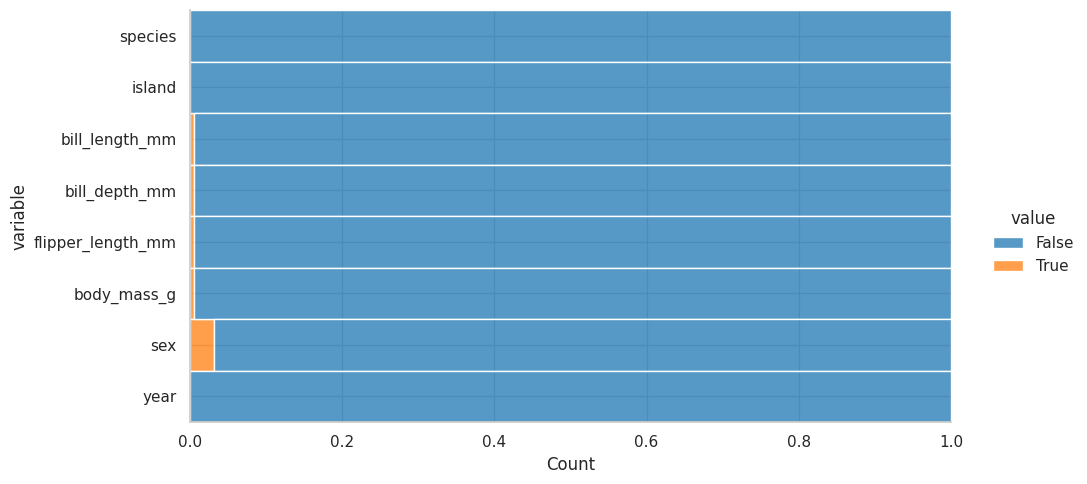

In [17]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df : (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect = 2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

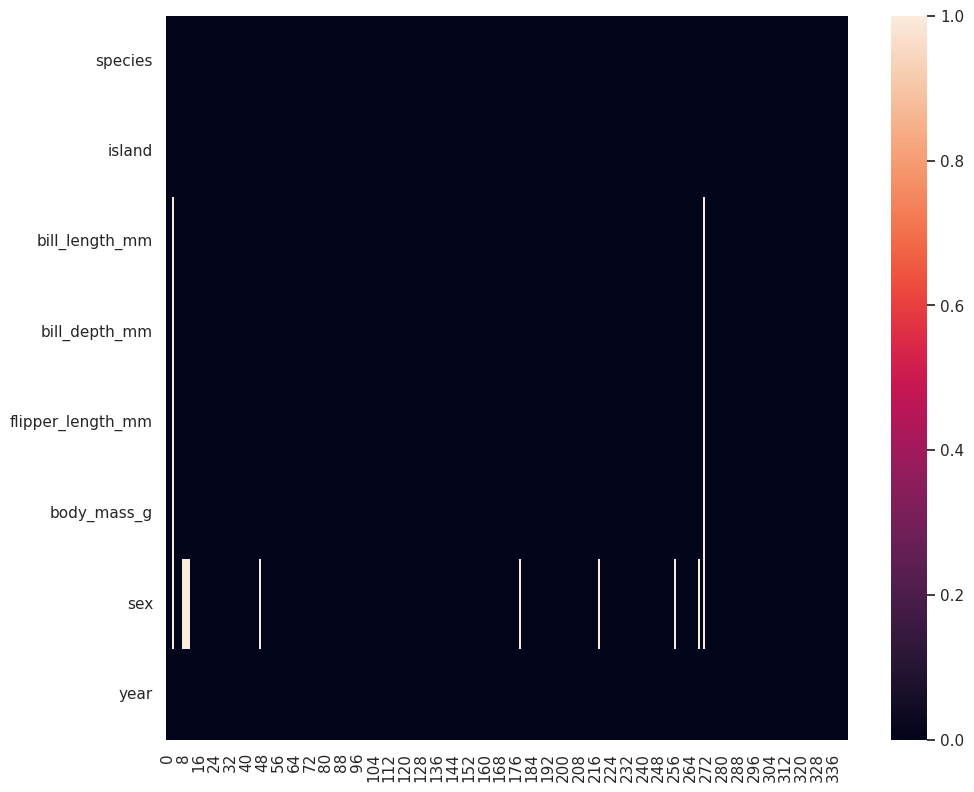

In [18]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : (
            sns.heatmap(
                data = df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [19]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

In [20]:
processed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [21]:
processed_penguins_df.describe(include = 'all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [22]:
processed_penguins_df.describe(include = [np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [23]:
processed_penguins_df.describe(include = object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [24]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

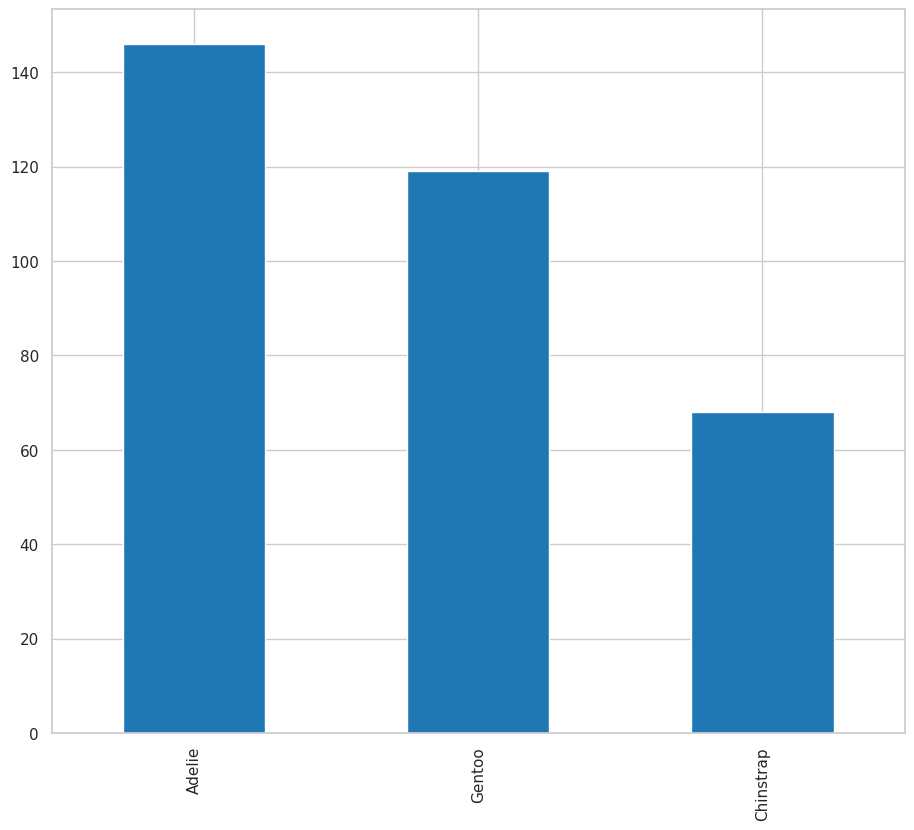

In [25]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(kind = 'bar')
)

### Seaborn

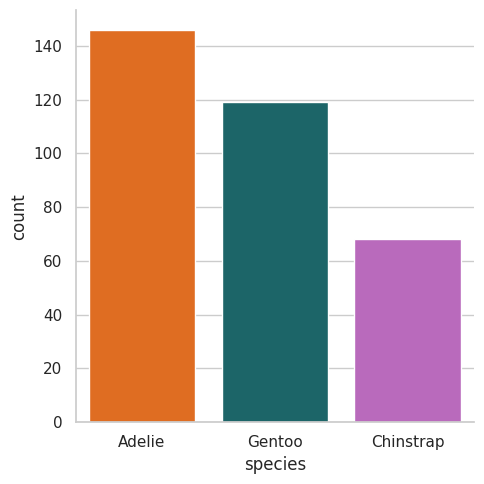

In [26]:
sns.catplot(
    processed_penguins_df,
    x = 'species',
    kind = 'count',
    palette= penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

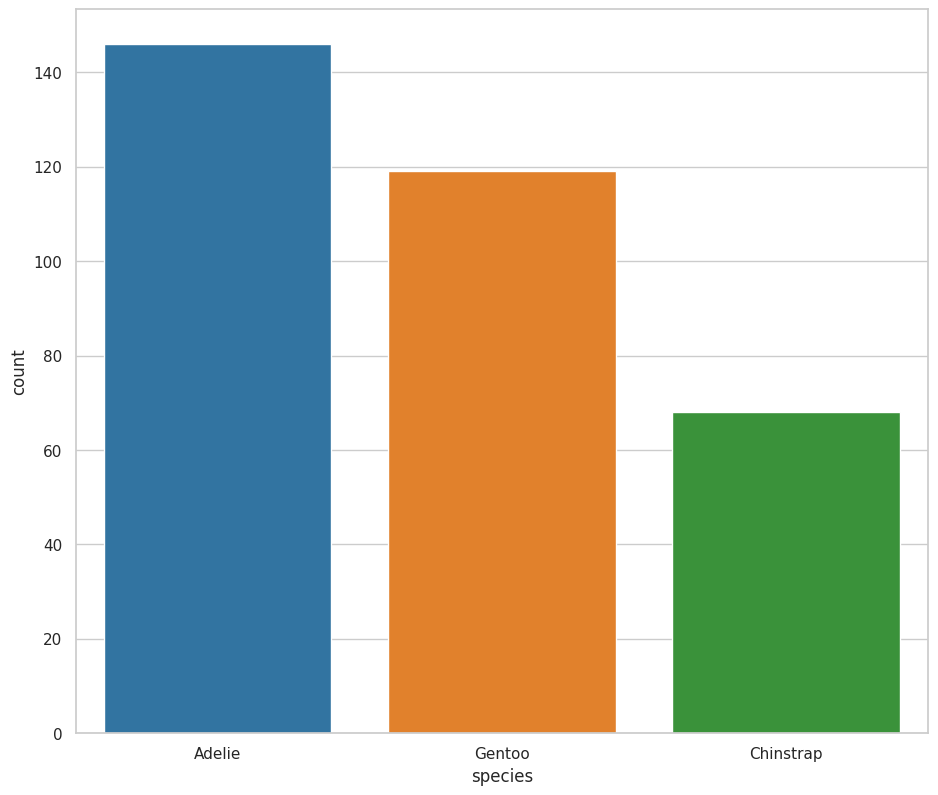

In [27]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data = df,
                x = 'species',
                y = 'count'
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

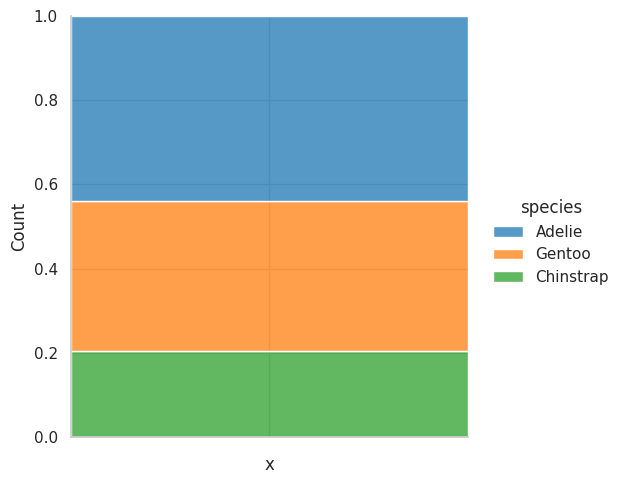

In [28]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = 'x',
                hue ='species',
                multiple='fill'
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [29]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [30]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [31]:
processed_penguins_df.mean()

/tmp/ipykernel_99/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [32]:
preprocess_penguins_df.median()

/tmp/ipykernel_99/1508209255.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

## Moda

In [33]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [34]:
preprocess_penguins_df.describe(include=object)

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [35]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [36]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [37]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [38]:
processed_penguins_df.std()

/tmp/ipykernel_99/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [39]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [40]:
processed_penguins_df.quantile(0.75)

/tmp/ipykernel_99/3609120765.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [41]:
processed_penguins_df.quantile(0.25)

/tmp/ipykernel_99/2653252021.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [42]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

/tmp/ipykernel_99/1337602098.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [43]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.5, 0.25])
    .T
    .rename_axis('variable')
    .reset_index()
    .assign(
       iqr = lambda df: df[0.75] - df[0.25]
    ) 
)

/tmp/ipykernel_99/2446967708.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

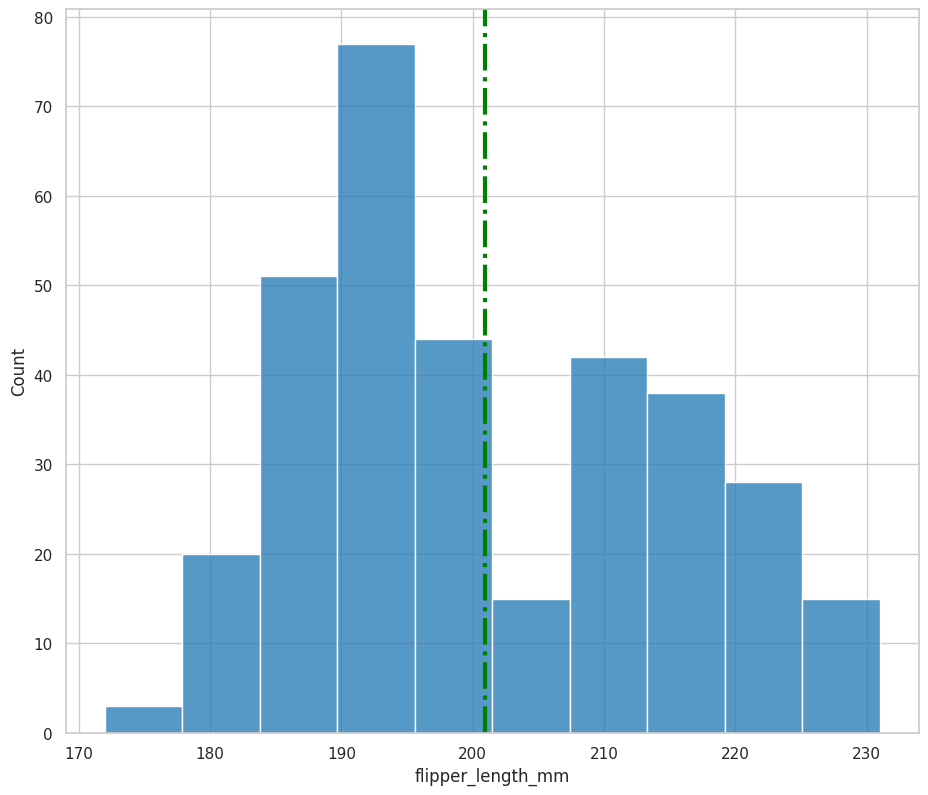

In [44]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='green',
    linestyle = 'dashdot',
    linewidth = 3
)

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

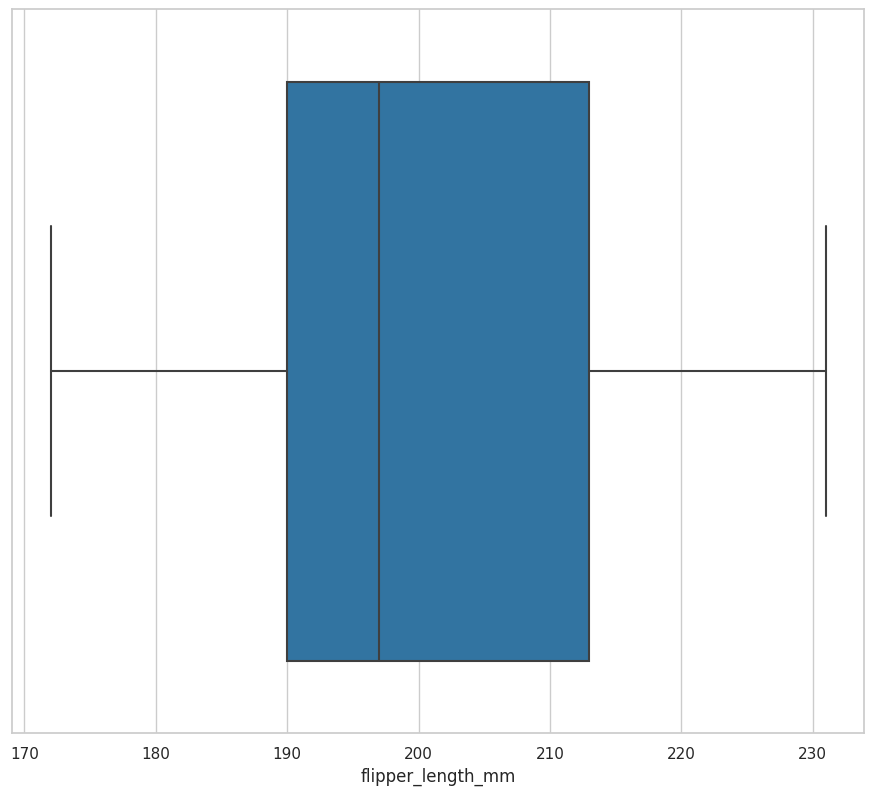

In [45]:
sns.boxplot(
    data= processed_penguins_df,
    x = 'flipper_length_mm'
)

### Limitaciones

In [46]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

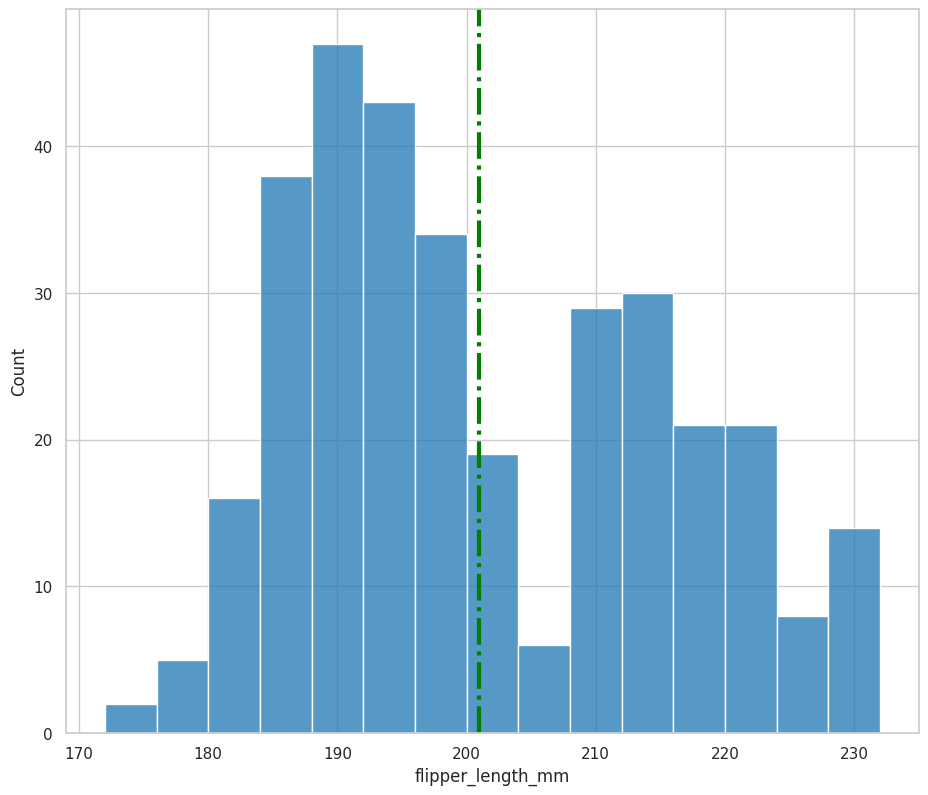

In [47]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='green',
    linestyle = 'dashdot',
    linewidth = 3
)

# Distribuciones: PMFs, CDFs y PDFs

# Estadística descriptiva aplicada: distribuciones

## ¿Cómo visualizar una distribución?

- Histograma
- Función de probabilidad de masas (PMF)
- Función de distribución acumulada (CDF)
- Función de probabilidad de densidad (PDF)

### _Función de probabilidad de masas (PMF)_
Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado.  Por ejemplo, la probabilidad de que en un salón haya personas que tengan 16 años.

La función de masa de probabilidad depende de los valores de cualquier número real. No va al valor de X que es igual a cero y en el caso de x, el valor de PMF es positivo.

El PMF juega un papel importante en la definición de una distribución de probabilidad discreta y produce resultados distintos. La fórmula de PMF es p (x) = P (X = x) es decir, la probabilidad de (x) = la probabilidad (X = una x específica)

### _Función de distribución acumulada (CDF)_
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado. Por ejemplo, cual es la probabilidad de que en un salón haya personas que tengan 16 o menos años.

En la teoría de la probabilidad y en estadística, la función de distribución acumulada  o función de probabilidad acumulada asociada a una variable aleatoria real $$X$$ sujeta a cierta ley de distribución de probabilidad, es una función matemática de la variable real $$x$$ que describe la probabilidad de que $$X$$ tenga un valor menor o igual que $$x$$.

Intuitivamente, asumiendo la función $$f$$ como la ley de distribución de probabilidad, la CFD sería la función con la recta real como dominio, con imagen del área hasta aquí de la función $$f$$, siendo aquí el valor $$x$$ para la variable aleatoria real $$X$$.
La CDF asocia a cada valor $$x$$, la probabilidad del evento: **_«la variable $$X$$ toma valores menores o iguales a $$x$$»_**.

### _Función de probabilidad de densidad (PDF)_
Determina la probabilidad de que una variable continua tome un valor determinado. Por ejemplo, la estatura de un grupo de personas.

En la teoría de la probabilidad, la función de densidad de probabilidad, función de densidad, o simplemente densidad de una variable aleatoria continua describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor.

La probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades estará dada por la integral de la densidad de esta variable entre uno y otro límite de dicha región.
La función de densidad de probabilidad  es positiva a lo largo de todo su dominio y su integral sobre todo el espacio es de valor unitario.

Una función de densidad de probabilidad caracteriza el comportamiento probable,  de una población, en tanto especifica la posibilidad relativa de que una variable aleatoria continua $$X$$ tome un valor cercano a $$x$$.

Una variable aleatoria $$X$$ tiene función de densidad $$f_{X}$$, siendo $$f_{X}$$ una función no-negativa integrable de Lebesgue, si:
$${\displaystyle \operatorname {P} [a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx}$$

si $$F_{X}$$ es la función de distribución de $$X$$, entonces

$${\displaystyle F_{X}(x)=\int _{-\infty }^{x}f_{X}(u)\,du}$$

### Parámetro de comparación PDF PMF

|Forma completa|Función de densidad de probabilidad|Función de probabilidad|
|--------------|-----------------------------------|-----------------------|
|Utilizar|El PDF se utiliza cuando es necesario encontrar una solución en un rango de variables aleatorias continuas.|PMF se utiliza cuando existe la necesidad de encontrar una solución en un rango de variables aleatorias discretas.|
|Variables aleatorias|PDF utiliza variables aleatorias continuas.|PMF utiliza variables aleatorias discretas.|
|Fórmula|$$F (x) = P (a X )$$|$$p (x) = P (X = x)$$|
|Solución|La solución cae en el rango de radio de variables aleatorias continuas.|Las soluciones se encuentran en el radio entre números de variables aleatorias discretas.|






## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

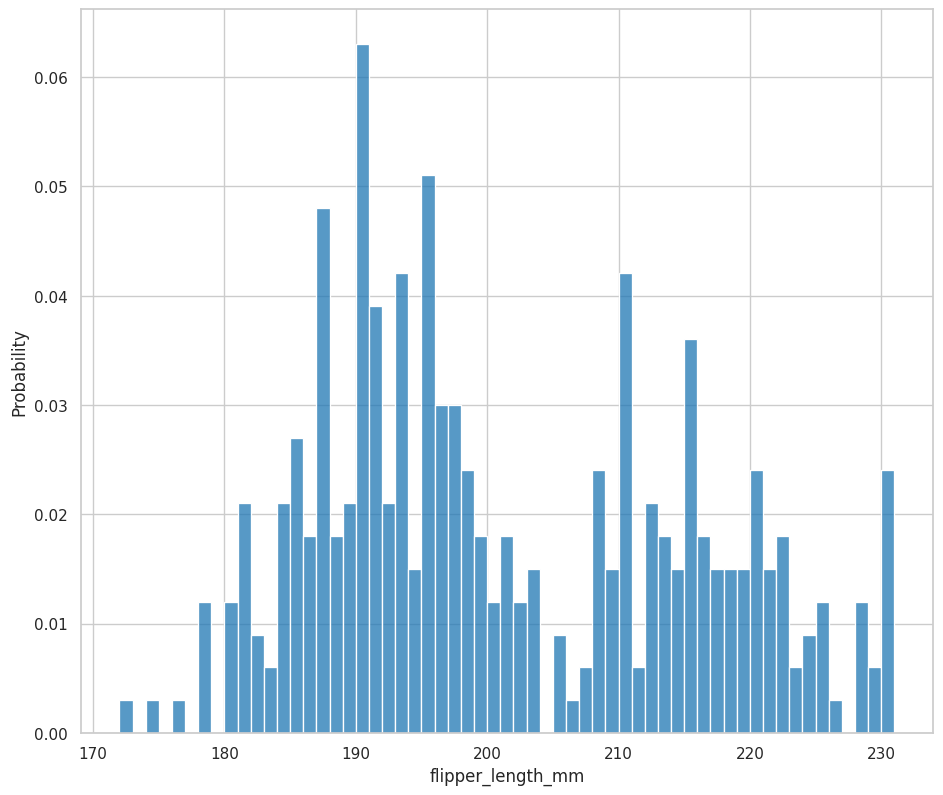

In [48]:
sns.histplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    binwidth = 1,
    stat = 'probability'
)

### Utilizando `empiricaldist`

In [49]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize = True
)

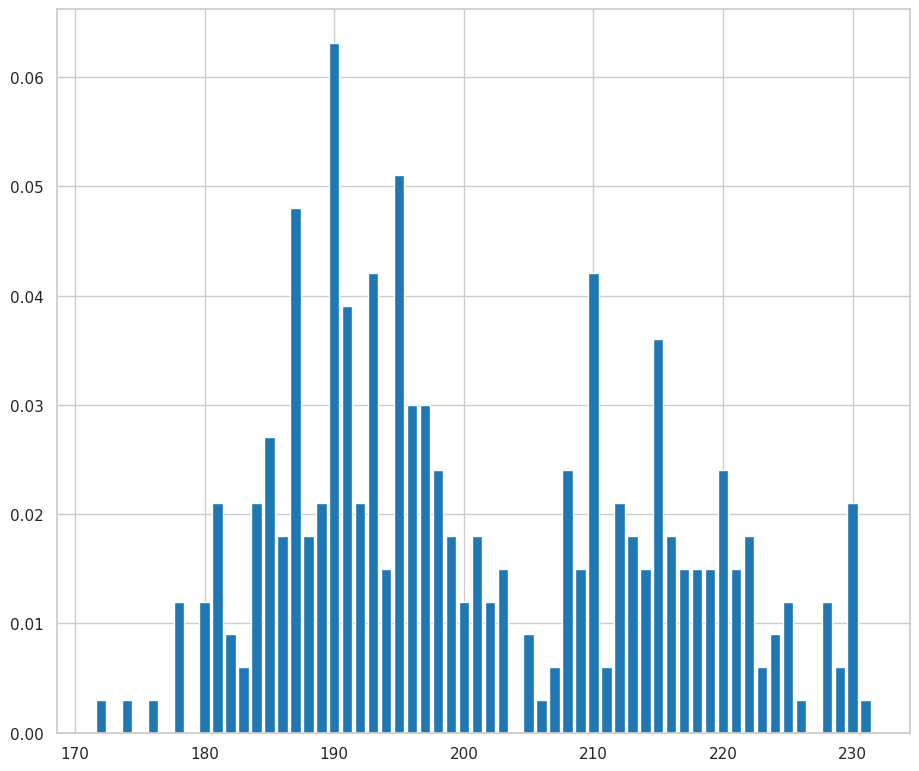

In [50]:
pmf_flipper_length_mm.bar()

In [51]:
#probabilidad  de encontrar un pinguino con esa longitud de alas
pmf_flipper_length_mm(190)

0.06306306306306306

In [52]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

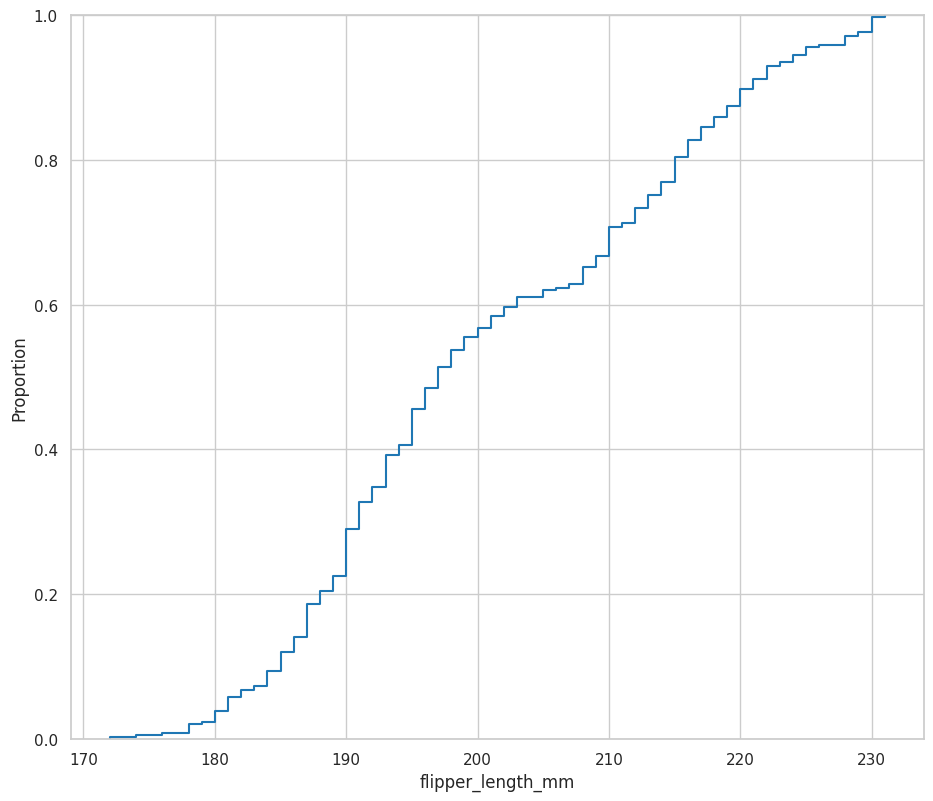

In [53]:
#Acumulada
sns.ecdfplot(
    data=preprocess_penguins_df,
    x = 'flipper_length_mm'
)

### Utilizando `empiricaldist`

In [54]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True   
)

la probabilidad de encontrar un pinguino con una longitud de alas de  200   mm es 0.5675675675675675 


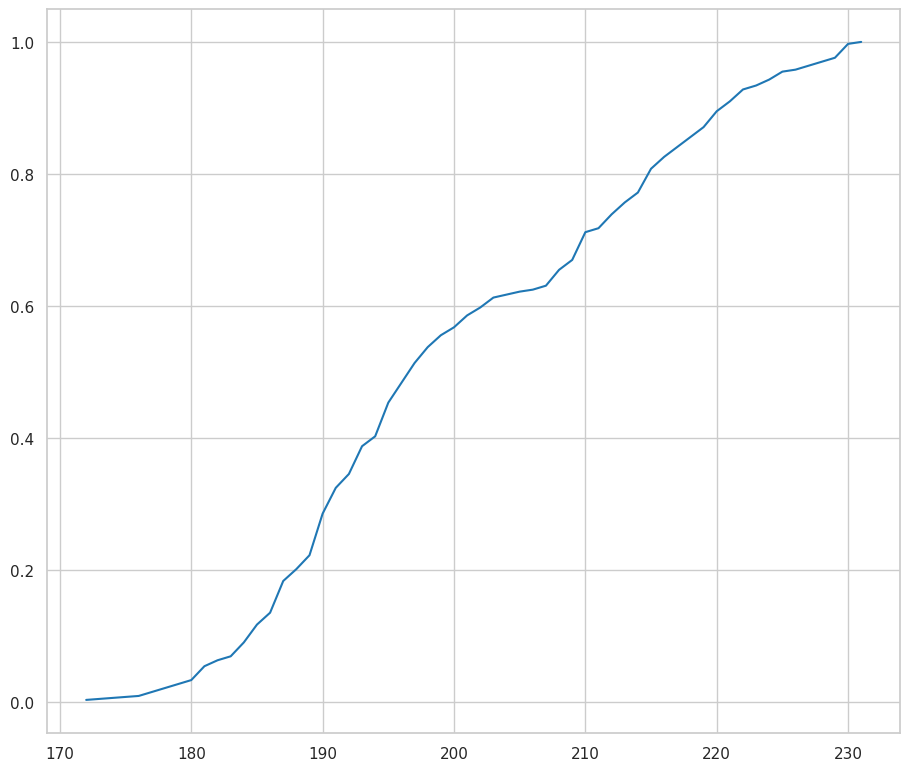

In [55]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm(q)
print('la probabilidad de encontrar un pinguino con una longitud de alas de  {}   mm es {} '.format(q,p) )

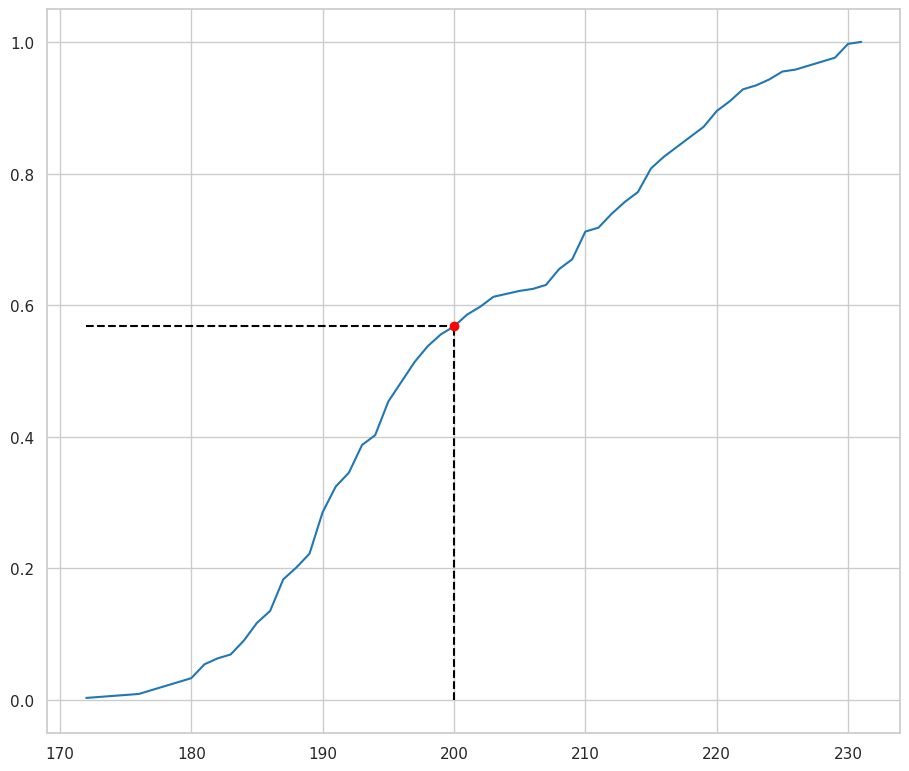

In [56]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

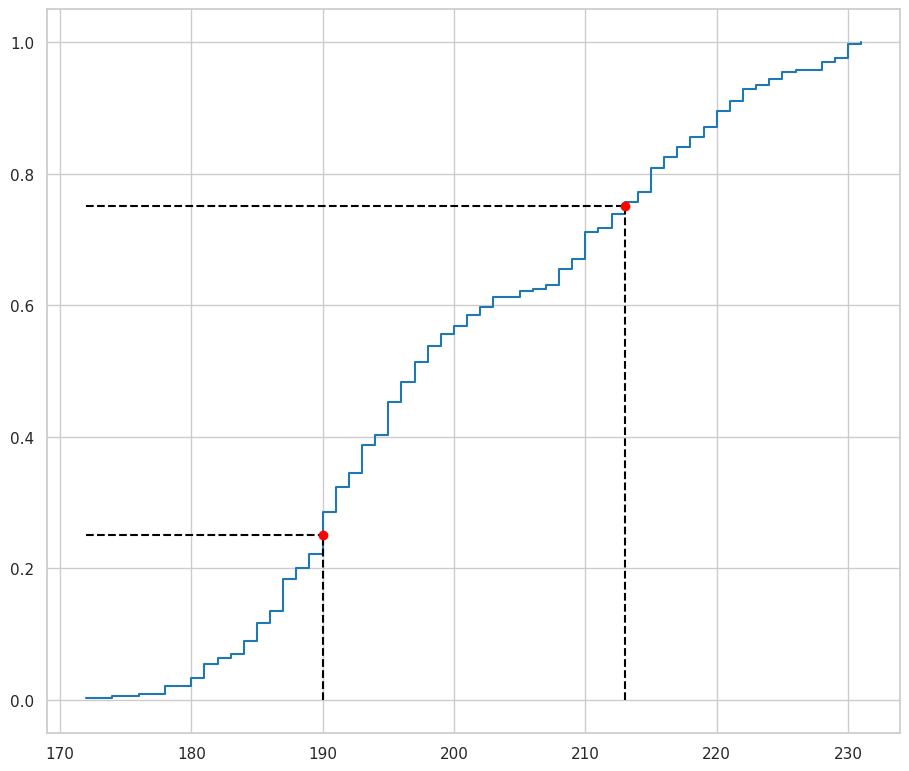

In [57]:
cdf_flipper_length_mm.step ( )
p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

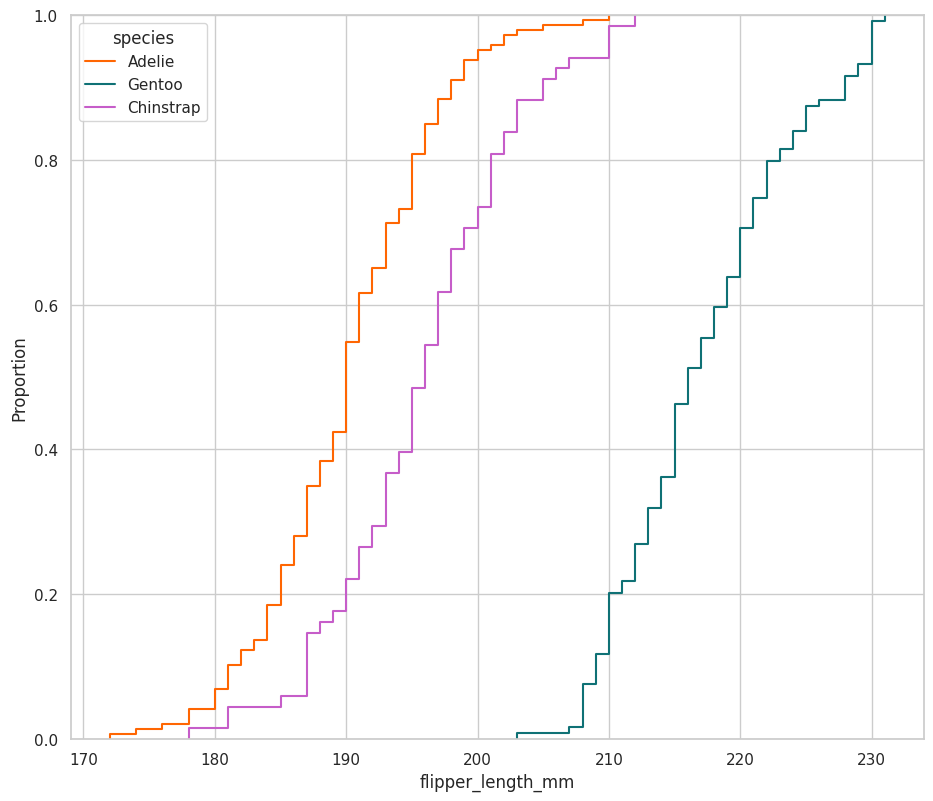

In [58]:
sns.ecdfplot(
    data=processed_penguins_df,
    x = 'flipper_length_mm',
    hue = 'species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

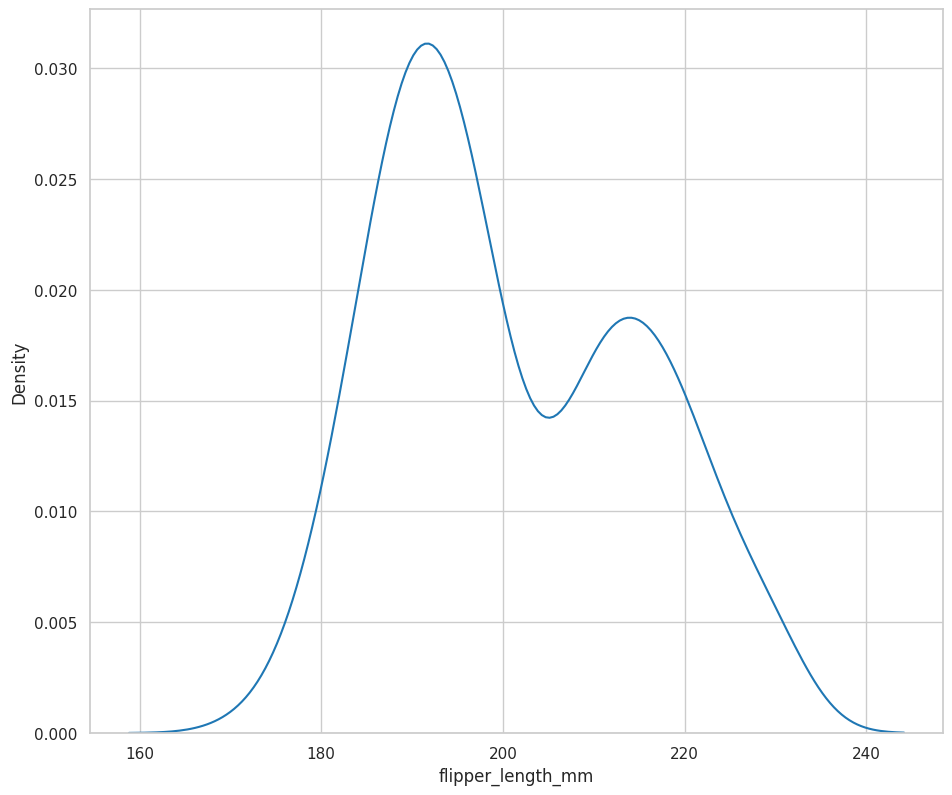

In [59]:
sns.kdeplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm'
)

In [60]:
stats = processed_penguins_df.body_mass_g.describe()

<AxesSubplot: >

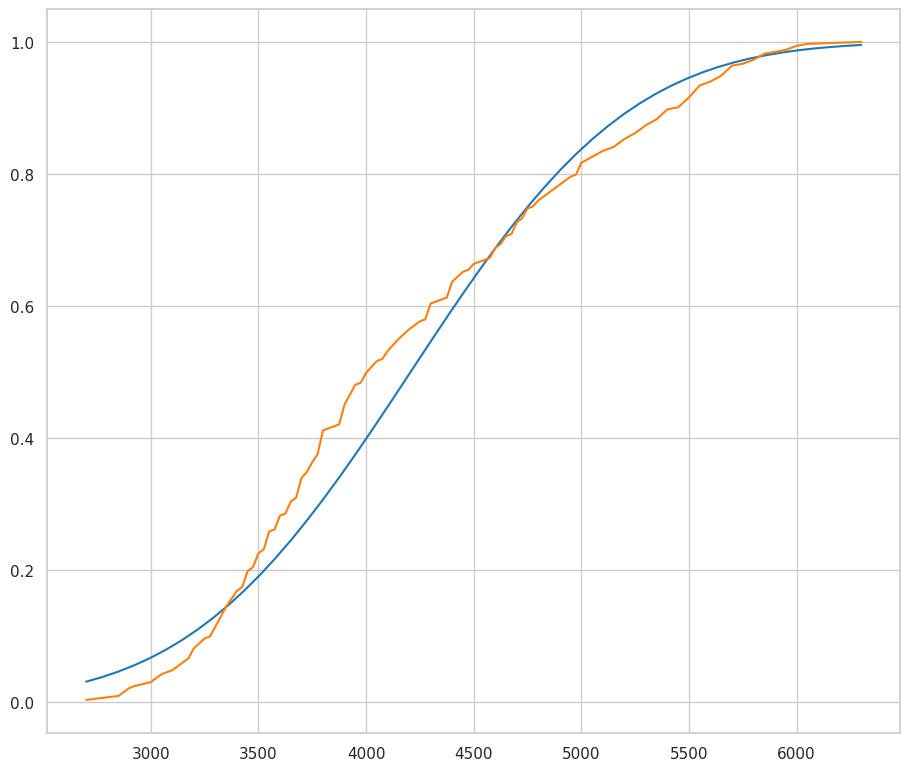

In [61]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs,ys)

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

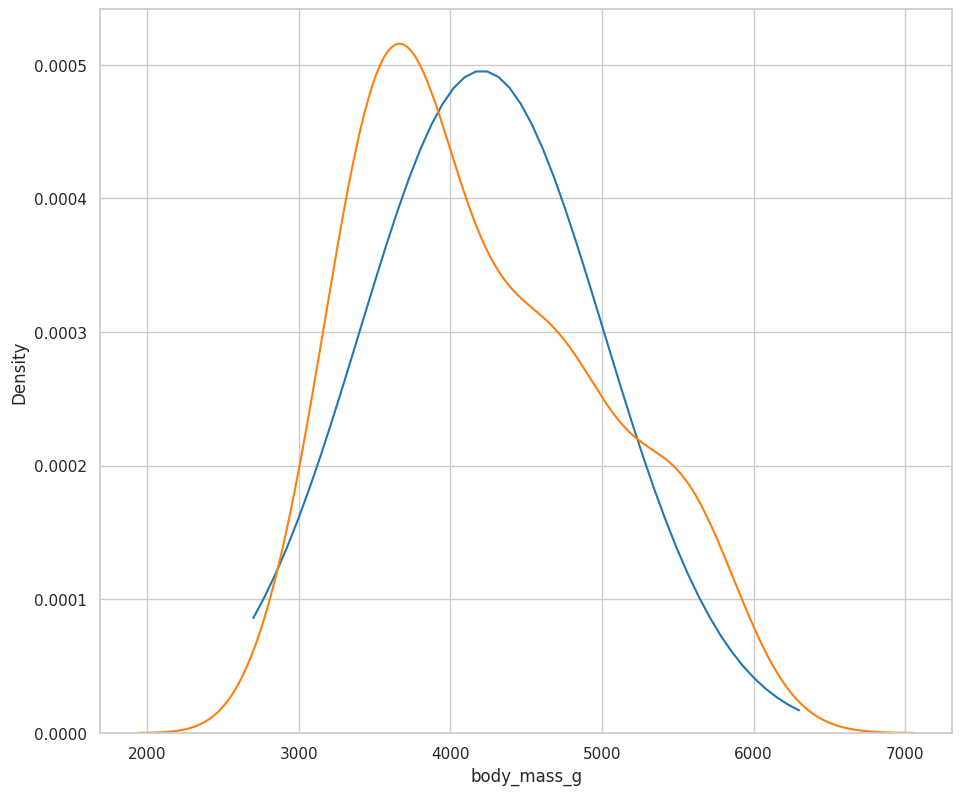

In [62]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs,ys)

sns.kdeplot(
    data=processed_penguins_df,
    x = 'body_mass_g'
)


# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

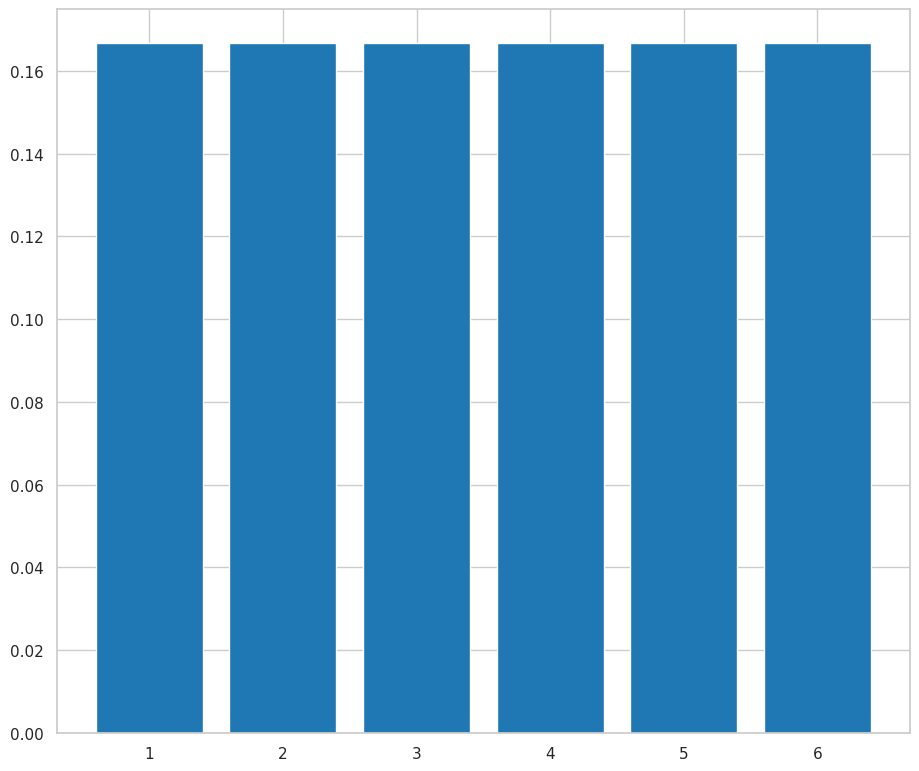

In [63]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

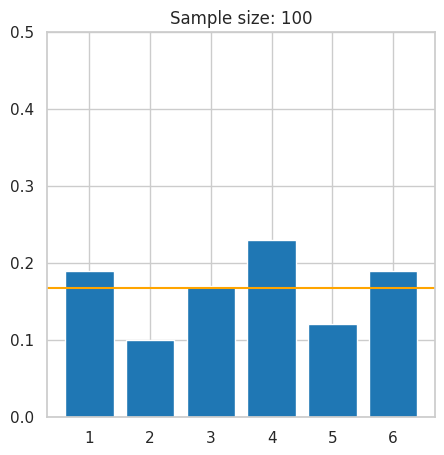

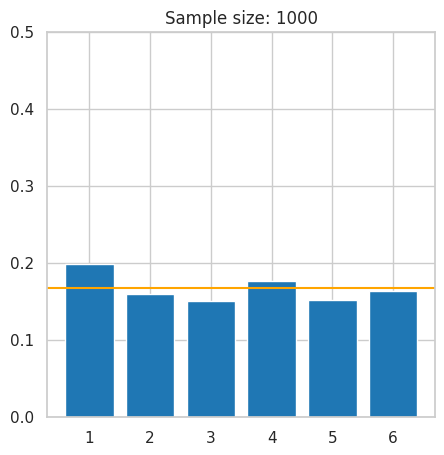

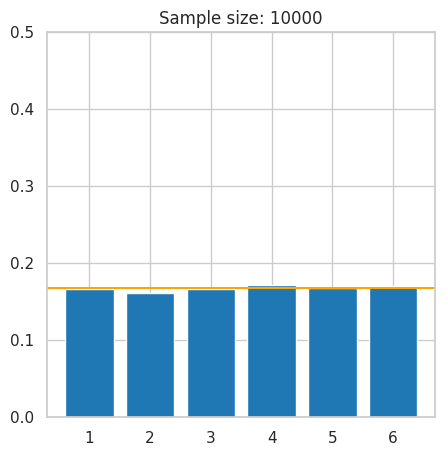

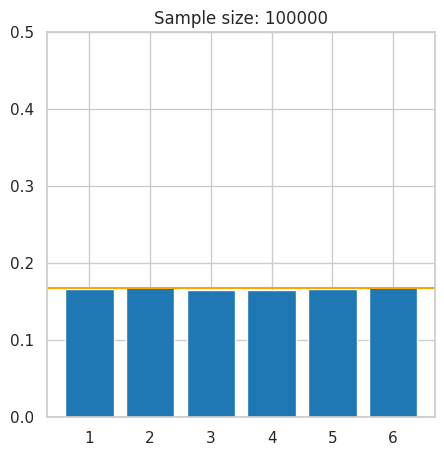

In [64]:
for sample_size in (1e2, 1e3, 1e4, 1e5):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='orange')
    plt.ylim([0,0.5])
    plt.title(f"Sample size: {sample_size}")

## Teorema del Límite Central

La media de las muestras tiende aproximadamente a una distribución normal.

La suma de $n$ variables aleatorias independientes con medias y varianzas finitas, converge en distribución a una variable aleatoria con distribución normal.


In [65]:
processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [66]:
sex_numeric = processed_penguins_df.sex.replace(['male', 'female'], [1,0])

In [67]:
number_samples = 100
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 49.9143%


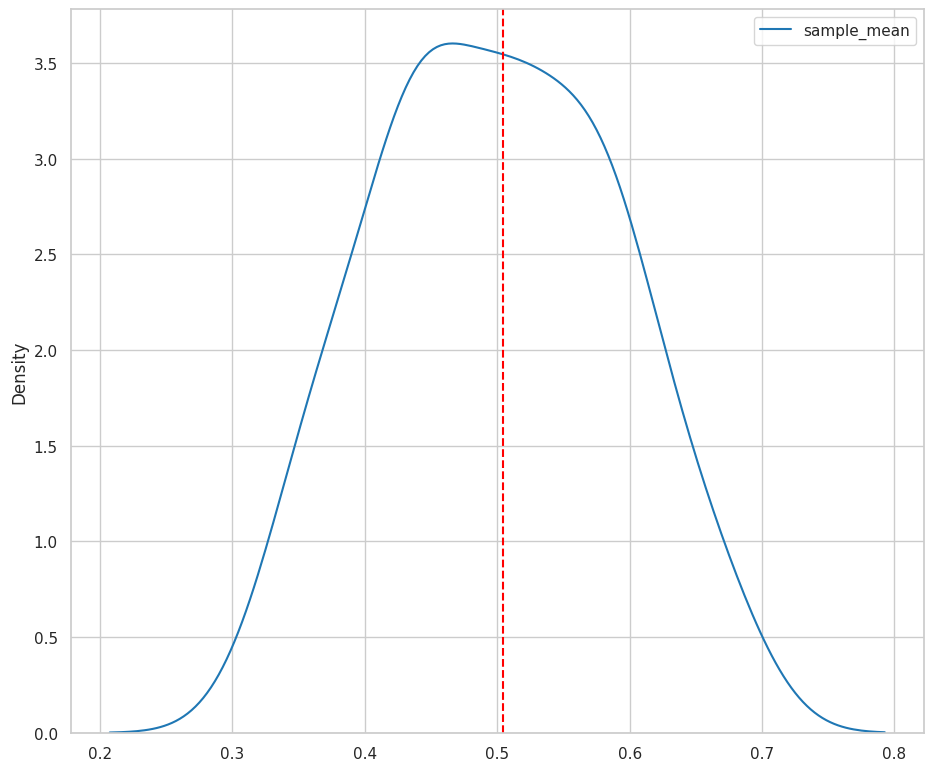

In [68]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [69]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

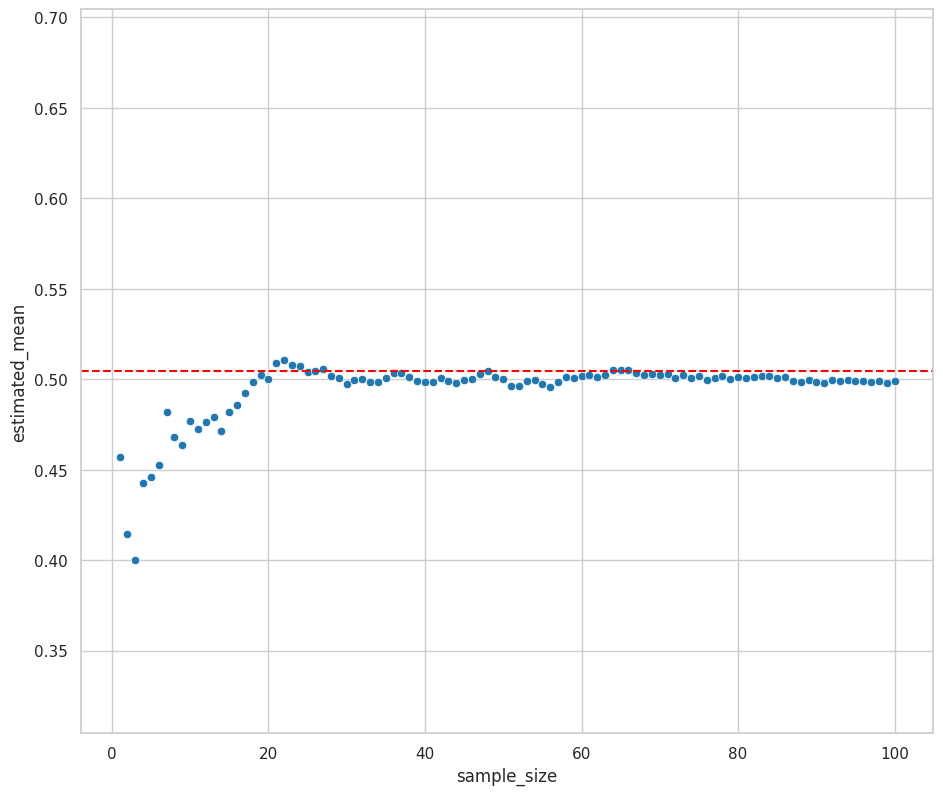

In [70]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

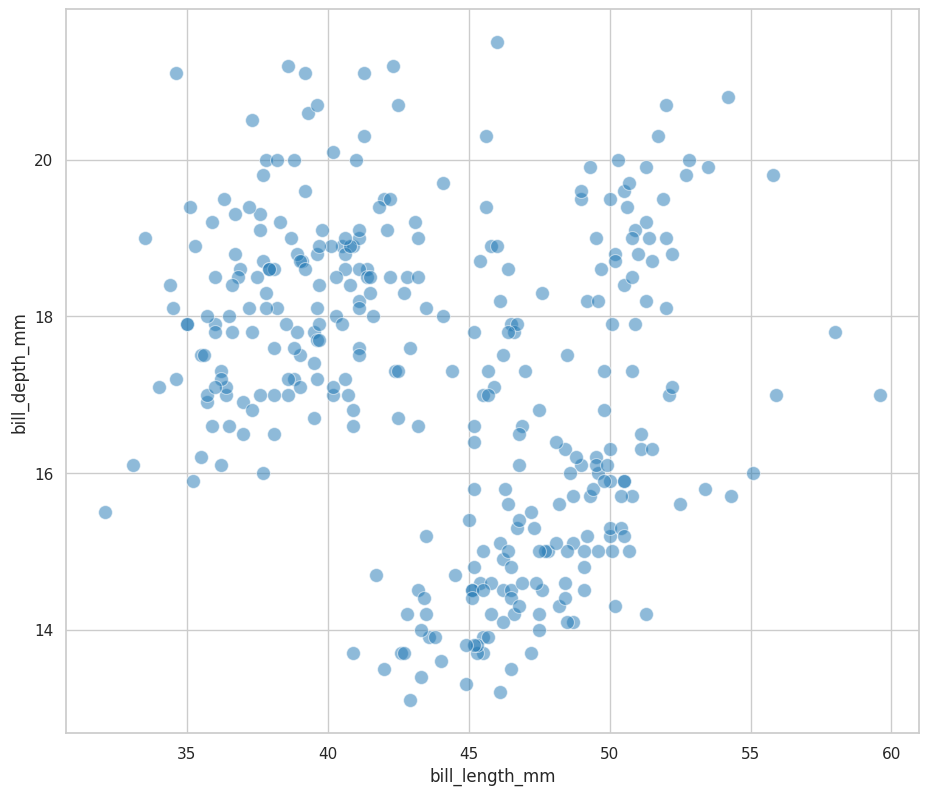

In [71]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    alpha= 1/2, #transparencia
    s = 100 #size
)

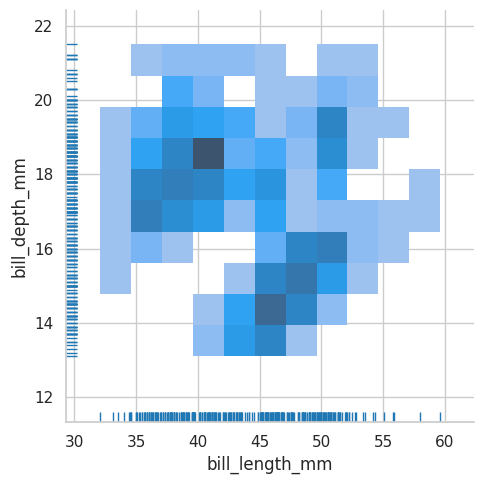

In [72]:
sns.displot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug = True
)

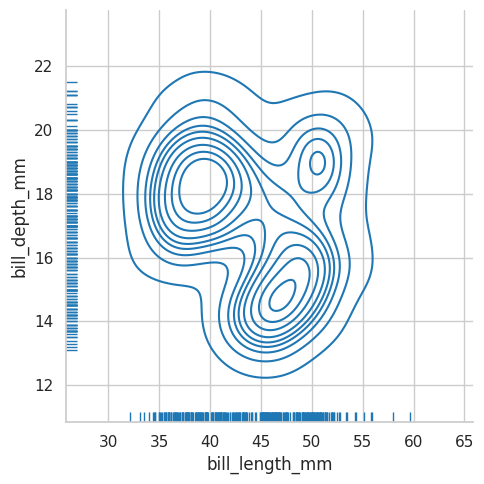

In [73]:
sns.displot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug = True,
    kind = 'kde'
)

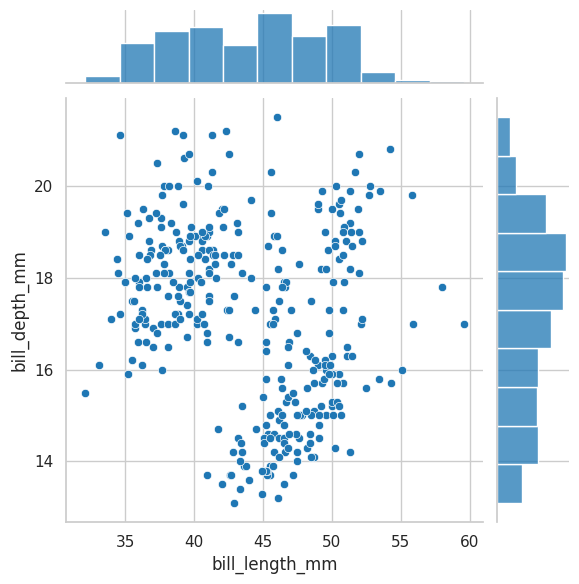

In [74]:
sns.jointplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

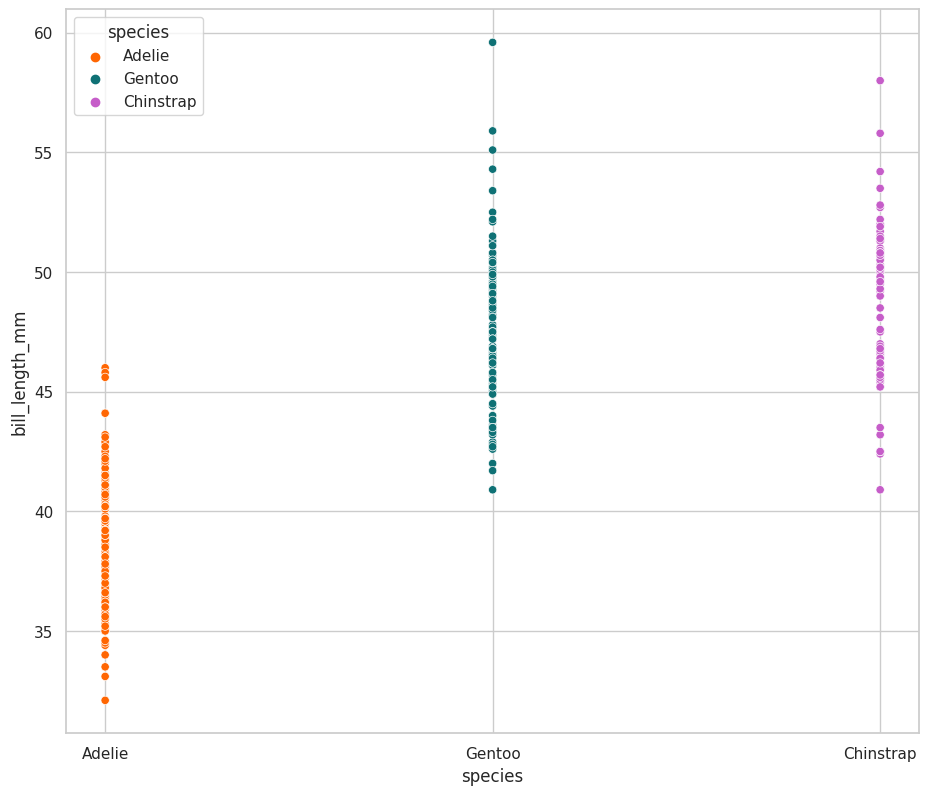

In [75]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='bill_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

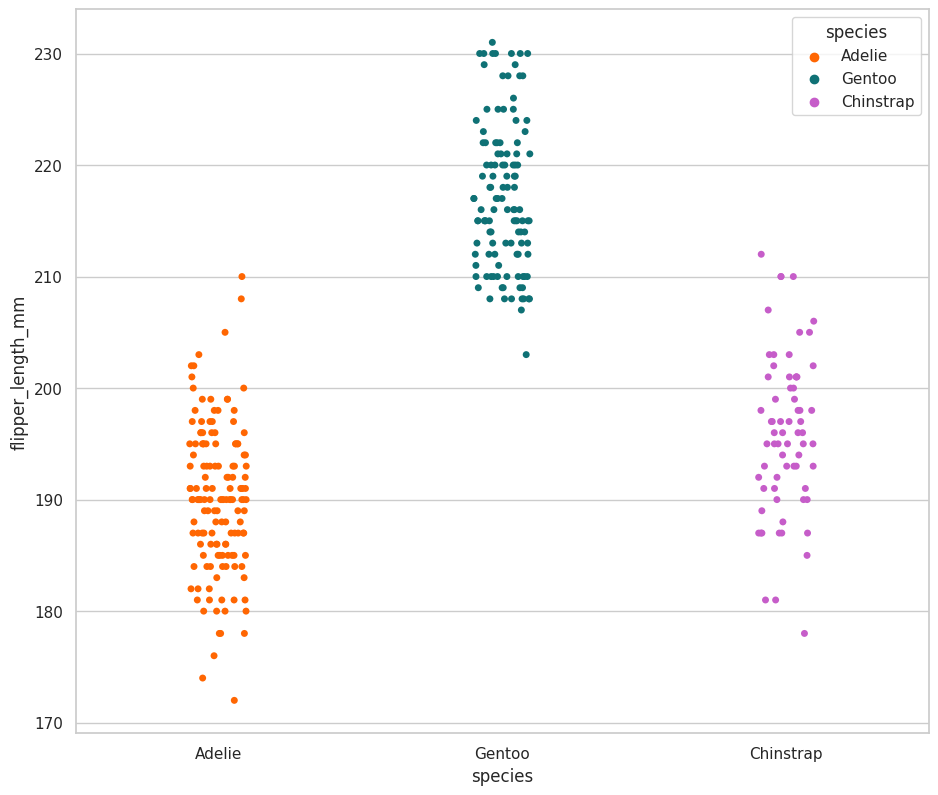

In [76]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

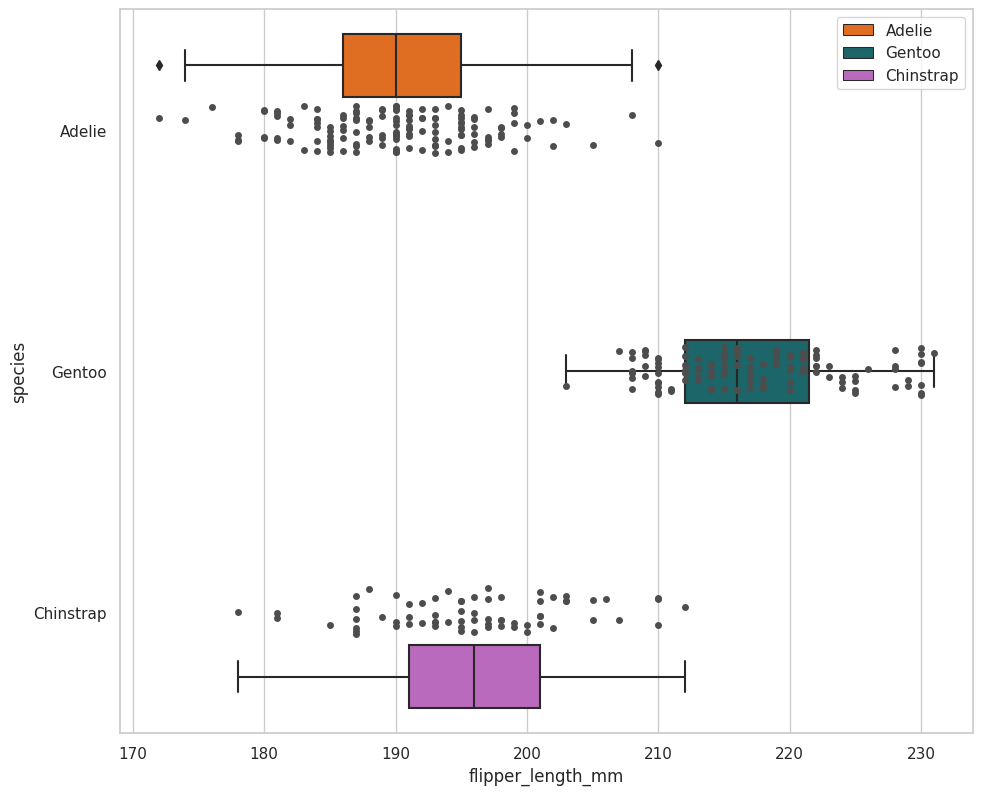

In [77]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color = '.3'
)

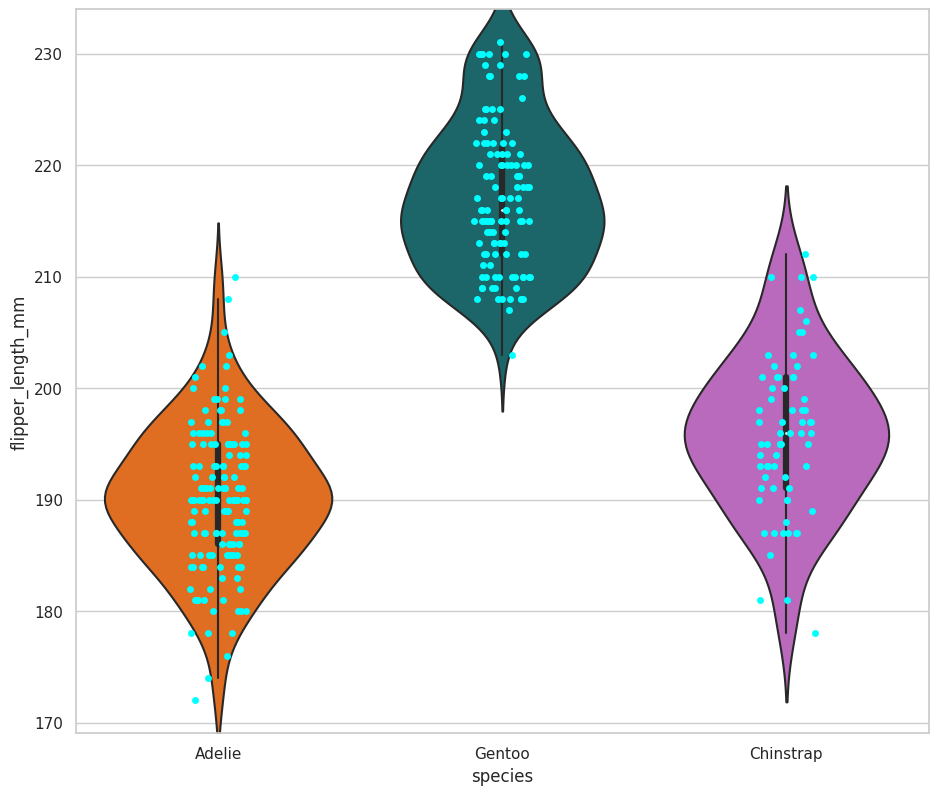

In [78]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color = 'cyan'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

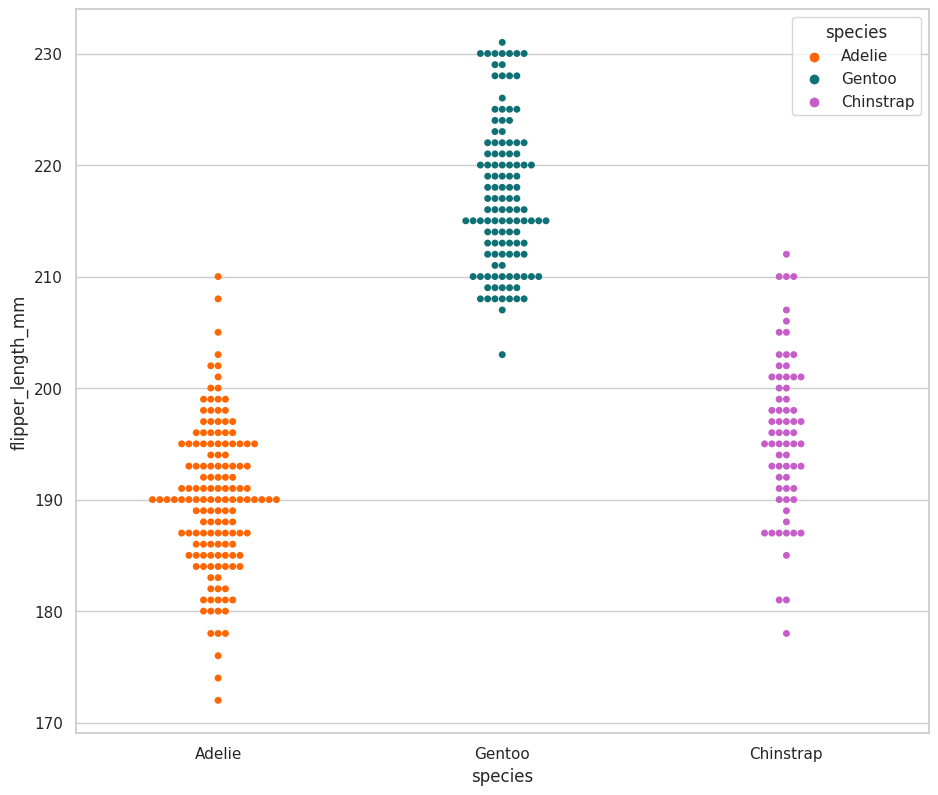

In [79]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

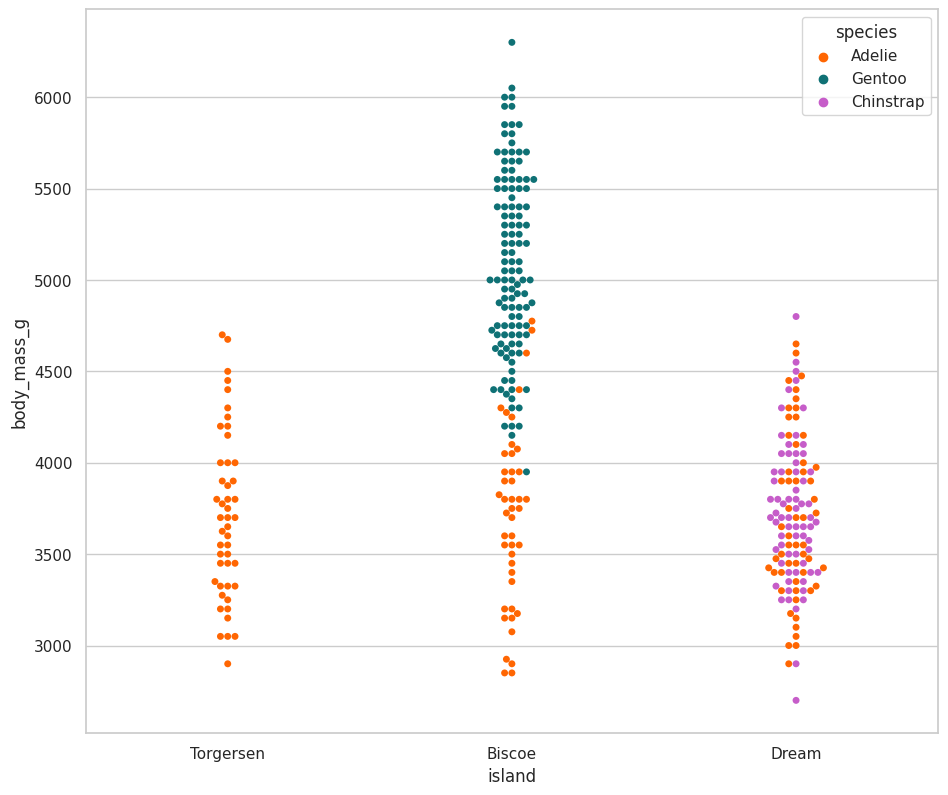

In [80]:
sns.swarmplot(
    data=processed_penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

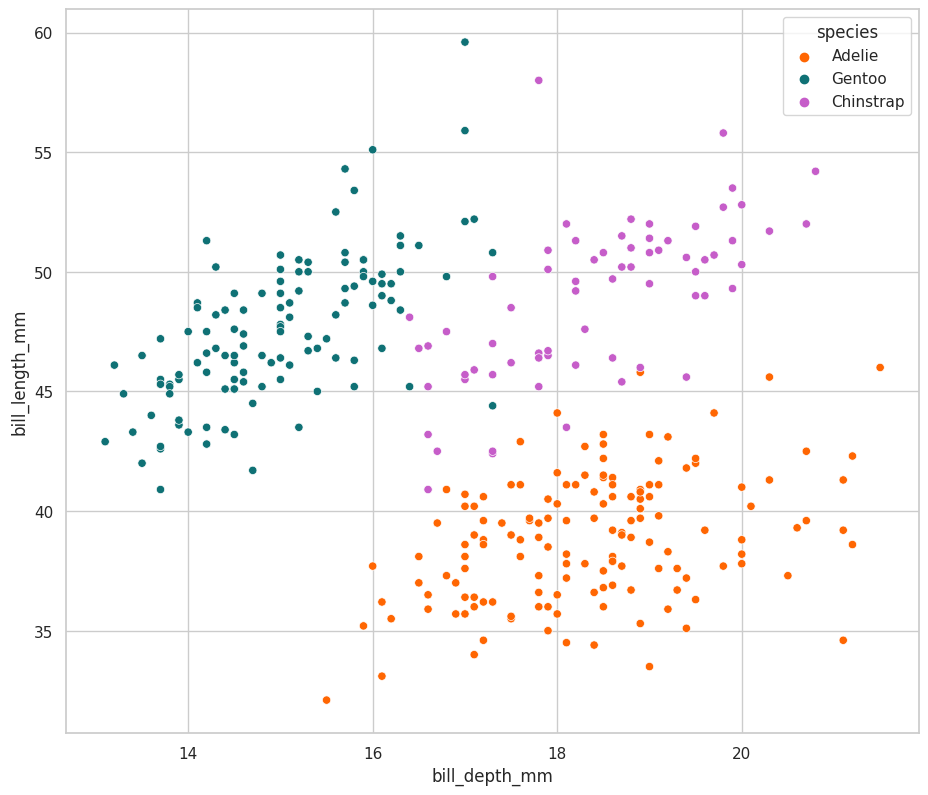

In [81]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='species',
    palette=penguin_color
)

In [82]:
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [83]:
processed_penguins_df.corr()

/tmp/ipykernel_99/4090656914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Cómo puedo visualizar los coeficientes de correlación?

/tmp/ipykernel_99/3544503298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = processed_penguins_df.corr(),


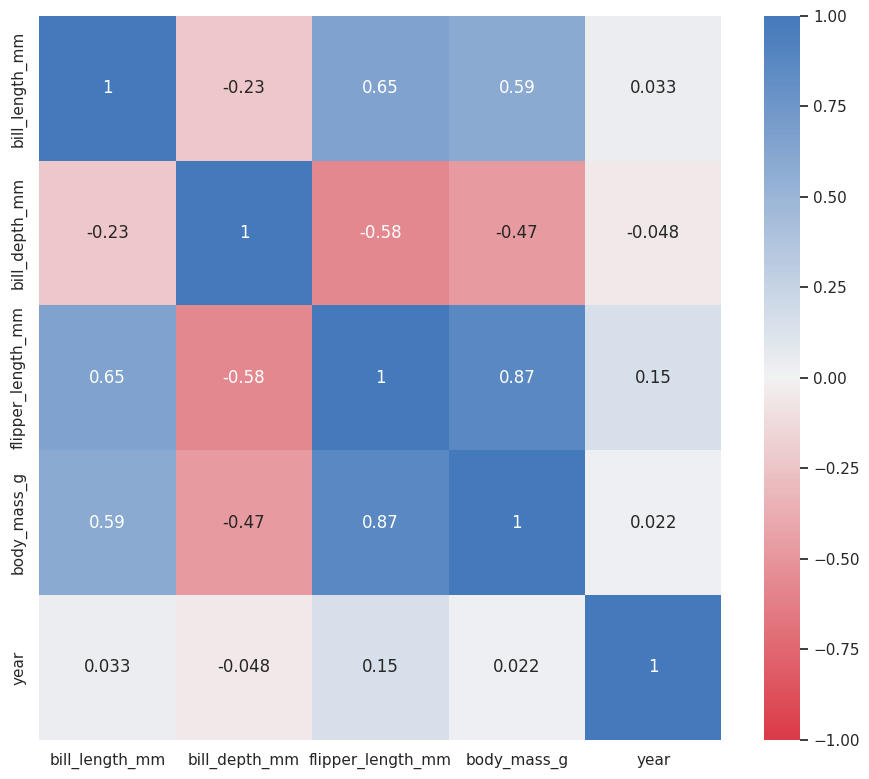

In [84]:
sns.heatmap(
    data = processed_penguins_df.corr(),
    annot= True,
    center=0,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(10,250, as_cmap = True)
);

/tmp/ipykernel_99/706013758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = processed_penguins_df.corr(),


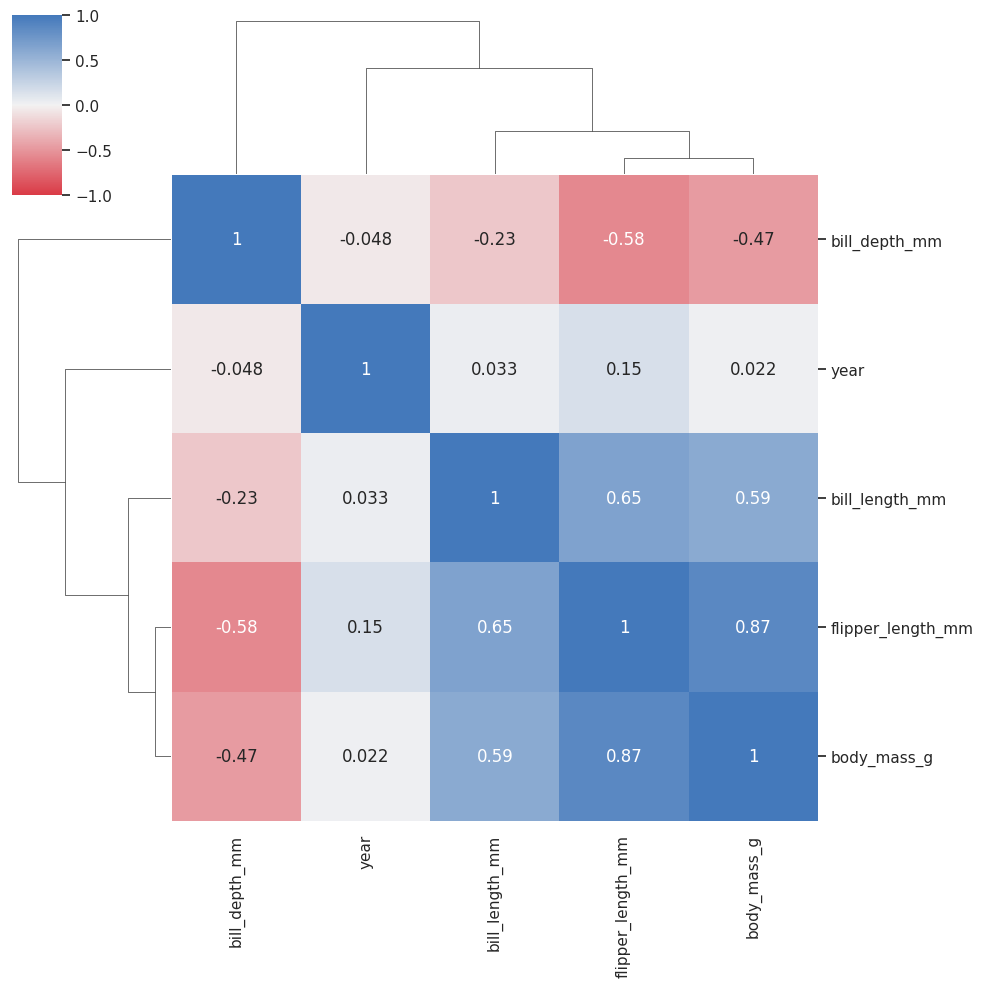

In [85]:
sns.clustermap(
    data = processed_penguins_df.corr(),
    annot= True,
    center=0,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(10,250, as_cmap = True)
);

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [86]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df:df.sex.replace(['female','male'], [0,1])
    )
)

/tmp/ipykernel_99/706013758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = processed_penguins_df.corr(),


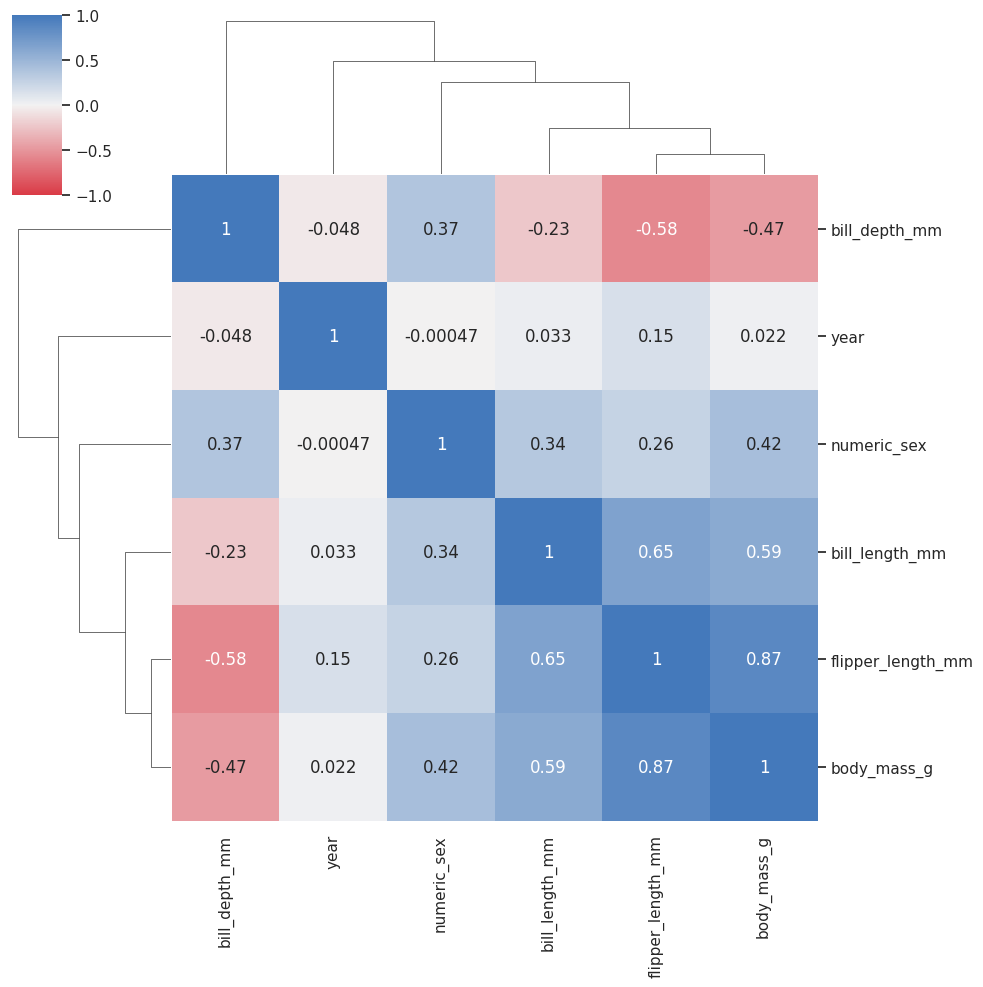

In [87]:
sns.clustermap(
    data = processed_penguins_df.corr(),
    annot= True,
    center=0,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(10,250, as_cmap = True)
);

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.00580429],
       [0.00580429, 1.        ]])

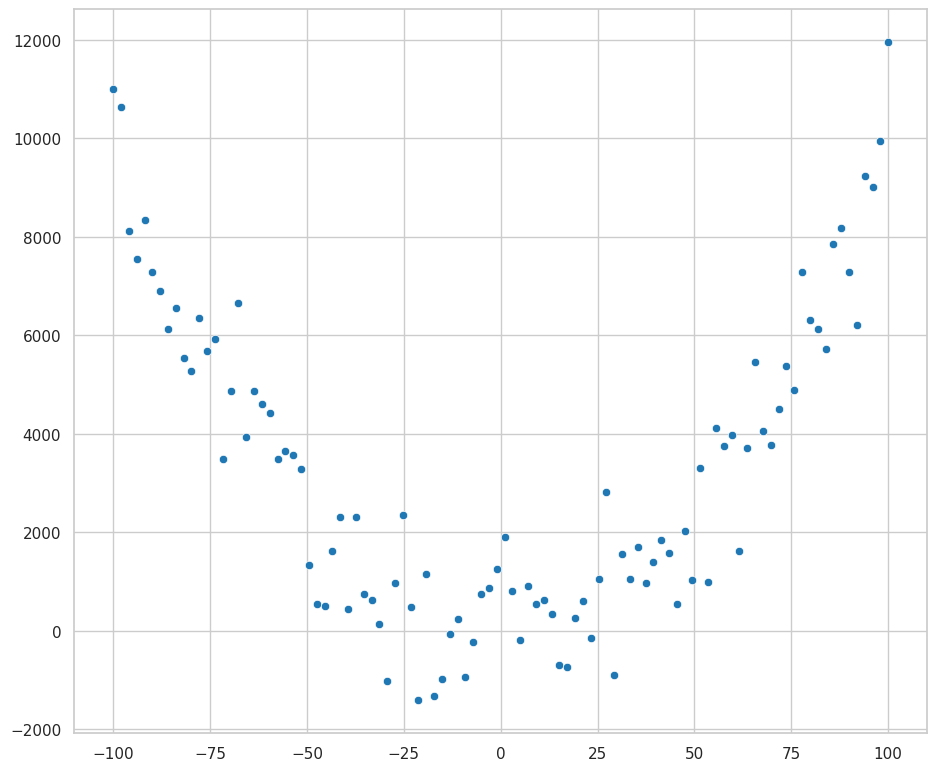

In [88]:
x = np.linspace(-100,100,100)
y=x**2
y += np.random.normal(0,1000, x.size)
sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x,y)

array([[1.        , 0.91655309],
       [0.91655309, 1.        ]])

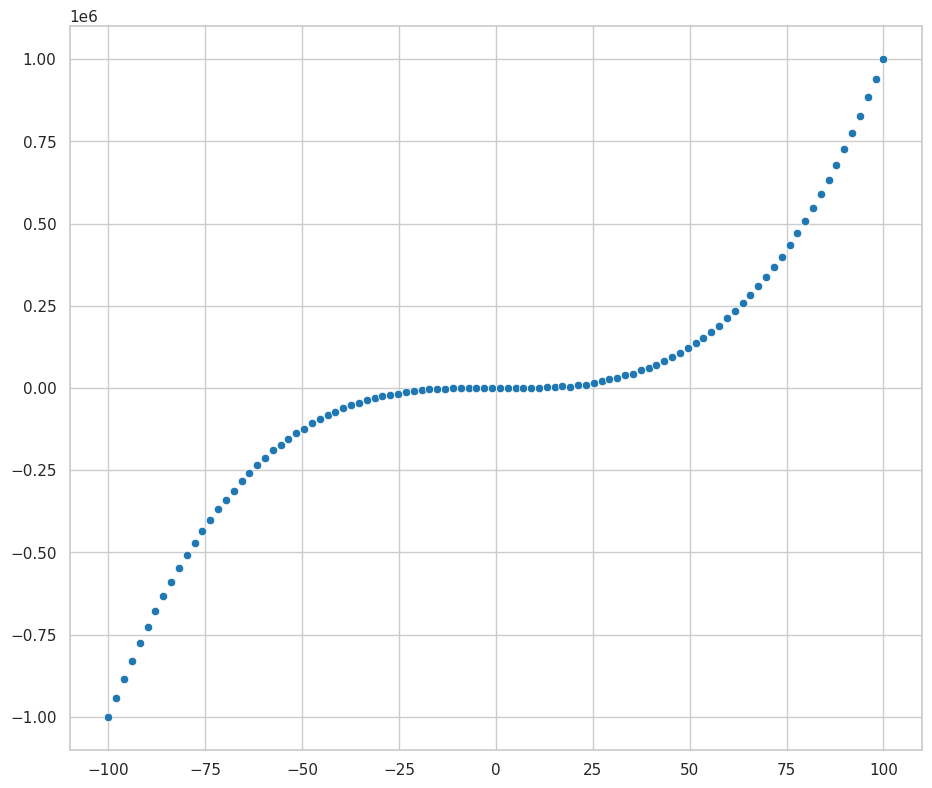

In [89]:
x = np.linspace(-100,100,100)
y=x**3
y += np.random.normal(0,1000, x.size)
sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

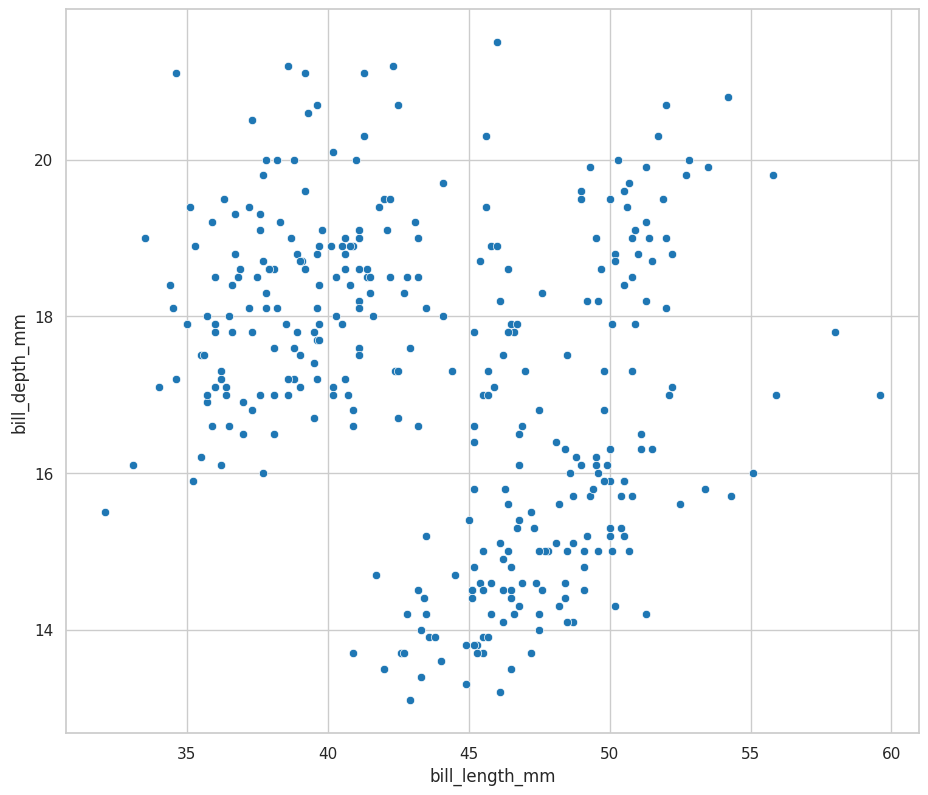

In [90]:

sns.scatterplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y='bill_depth_mm'
)



### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


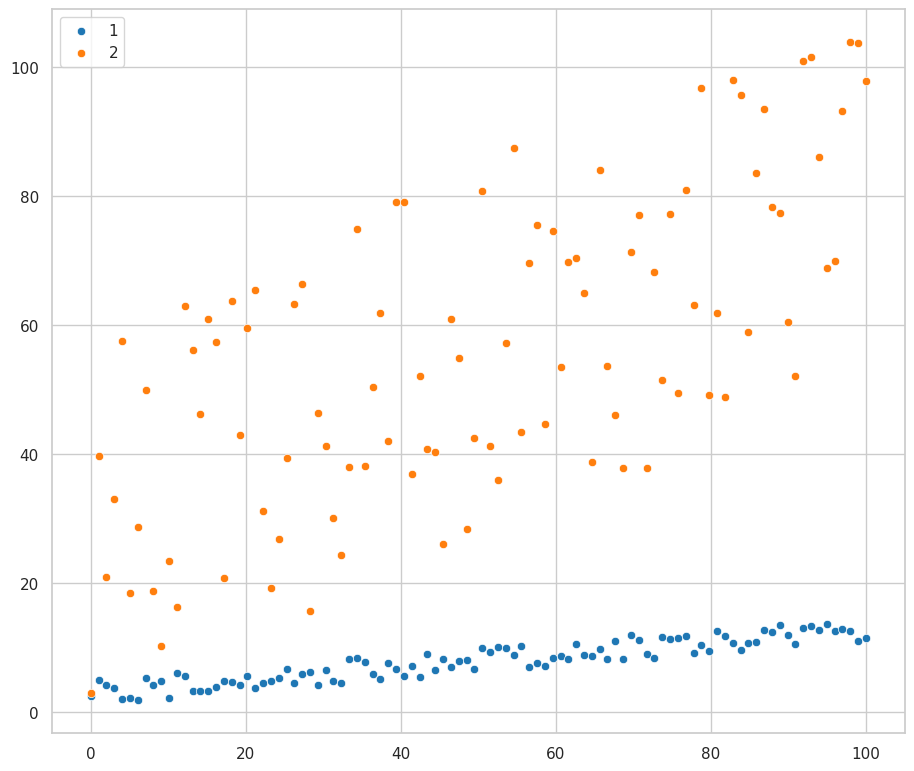

In [91]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

Permite medir la fuerza del efecto en los datos mediante el ajuste de una linea recta. Es mucho mas efectivo para interpretar el comportamiento de los datos.

Regression Lineal con scipy

In [92]:
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


- Esto arroja parametros como el slope el cual indica la pendiente de la recta (A mayor slope, mayor el efecto de la variable x sobre la variable y), intercep que indica el punto donde la linea corta el eje ‘y’ y el rvalue que nos indica la proporcion de datos capturados lo que ayuda en una mejor descripcion de los datos.

- Ejemplo donde se realiza de manera manual la regresion lineal con scipy.

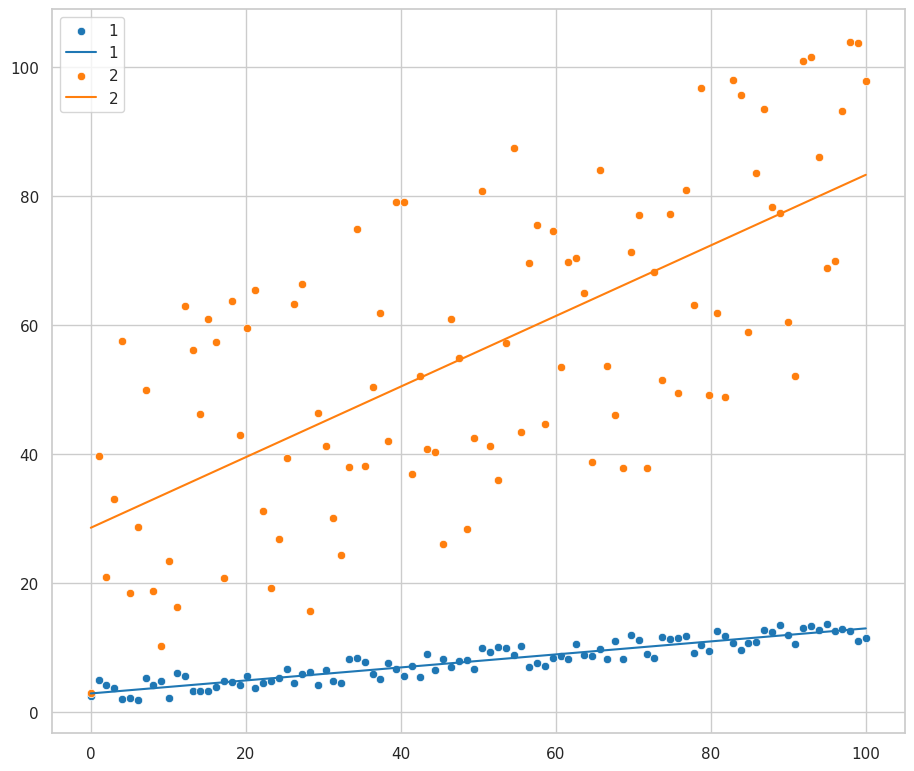

In [93]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


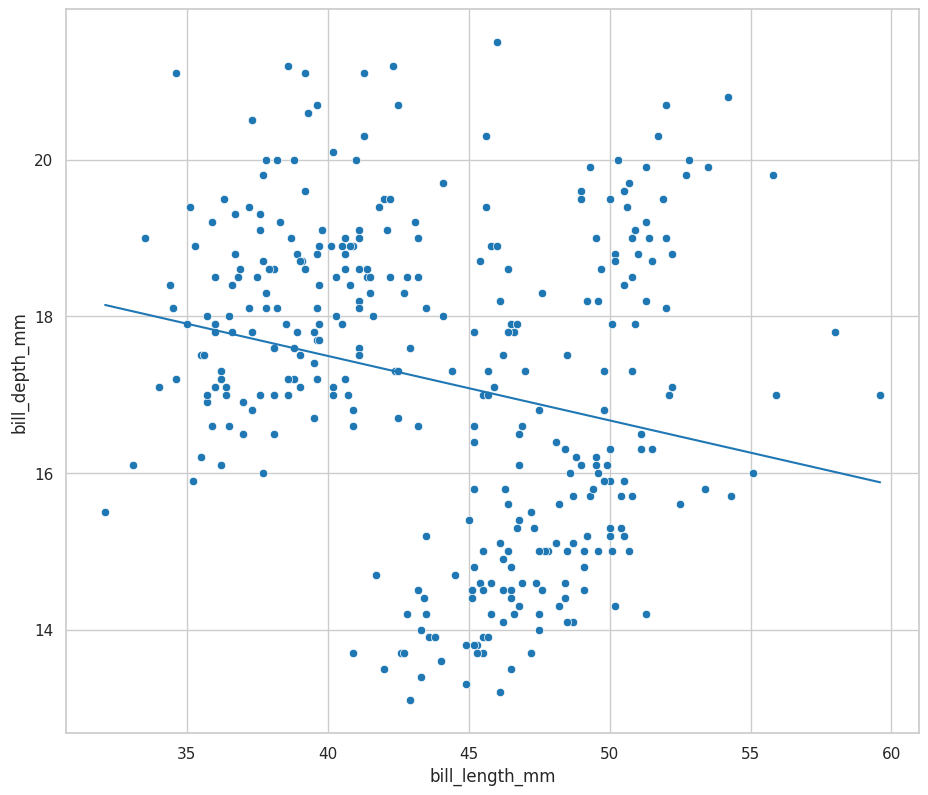

In [94]:
sns.scatterplot(
    processed_penguins_df, 
    x="bill_length_mm", 
    y="bill_depth_mm")

res_penguins = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
    )

print(res_penguins)

fx1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1,fy1) 

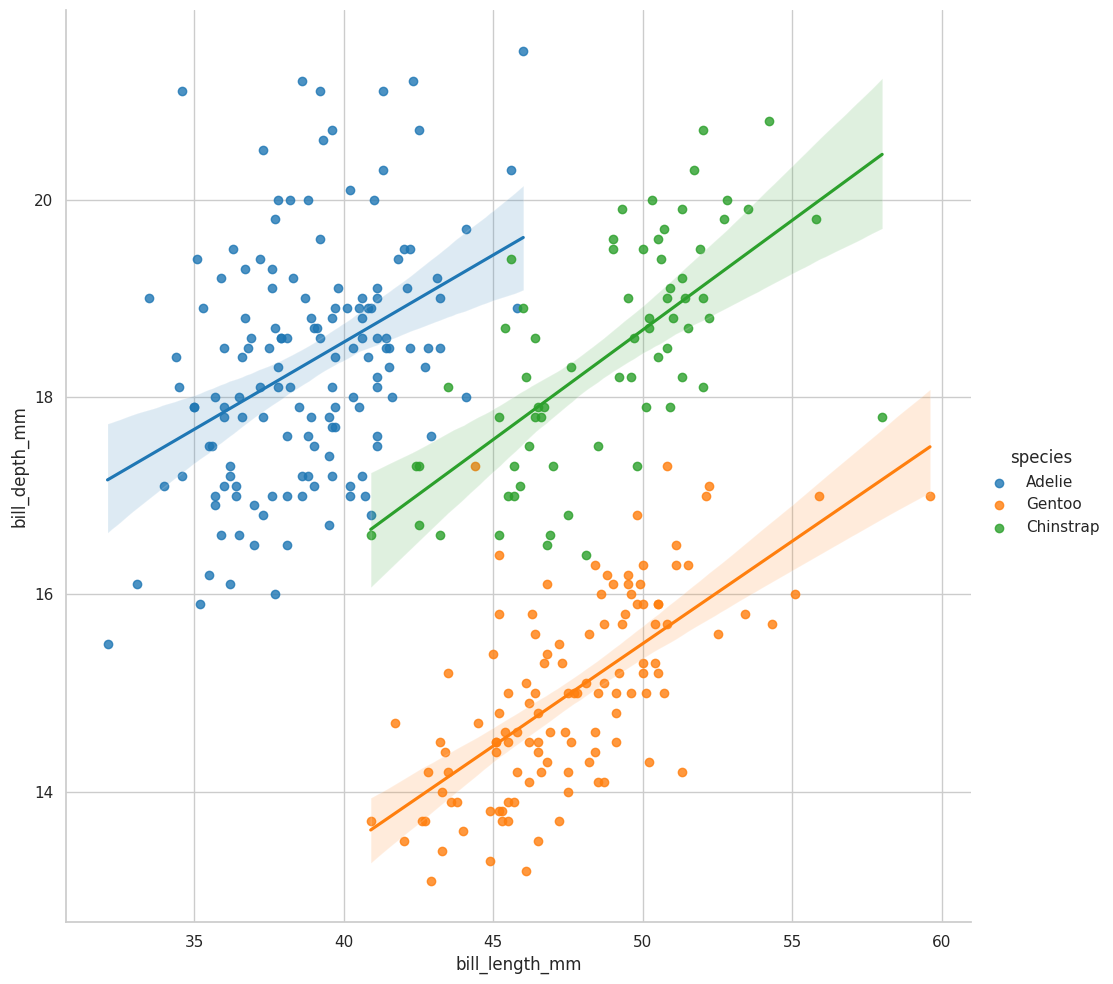

In [95]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
    )

plt.show()

LinregressResult(slope=0.006610472770963933, intercept=165.60324098377683, rvalue=0.4648539302610767, pvalue=3.401644085786839e-09, stderr=0.0010492237142985077, intercept_stderr=3.9180528615764896)
LinregressResult(slope=0.009340925526910201, intercept=169.66721958565057, rvalue=0.7113052561445228, pvalue=1.2493975624848216e-19, stderr=0.0008533440042105367, intercept_stderr=4.366443731939459)
LinregressResult(slope=0.01190506439617672, intercept=151.3808735739785, rvalue=0.6415594129316968, pvalue=3.7481299992316526e-09, stderr=0.00175210364329271, intercept_stderr=6.574823251756468)


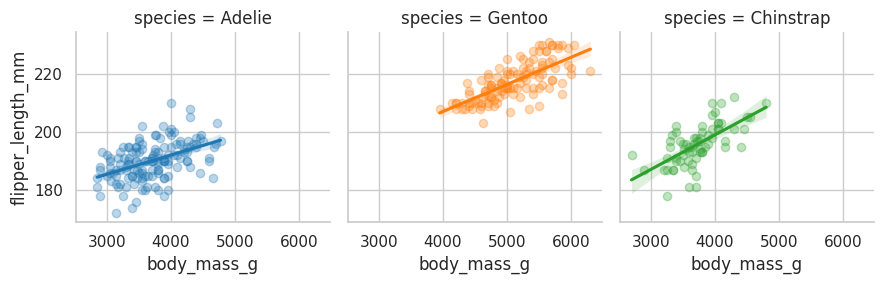

In [96]:
sns.FacetGrid(
    processed_penguins_df,
    col= 'species',
    hue = 'species'
    ).map(sns.regplot,
        'body_mass_g',
        'flipper_length_mm',
        scatter_kws={'alpha':0.3}
        )

adelie = processed_penguins_df[processed_penguins_df['species'] == 'Adelie']
gentoo = processed_penguins_df[processed_penguins_df['species'] == 'Gentoo']
chinstrap = processed_penguins_df[processed_penguins_df['species'] == 'Chinstrap']

ade = scipy.stats.linregress(x = adelie['body_mass_g'], y = adelie['flipper_length_mm'])
gen = scipy.stats.linregress(x = gentoo['body_mass_g'], y = gentoo['flipper_length_mm'])
chin = scipy.stats.linregress(x = chinstrap['body_mass_g'], y = chinstrap['flipper_length_mm'])

print(ade, gen, chin, sep='\n')

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [97]:
x = processed_penguins_df.bill_depth_mm
y = processed_penguins_df.bill_length_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)
print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)
LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


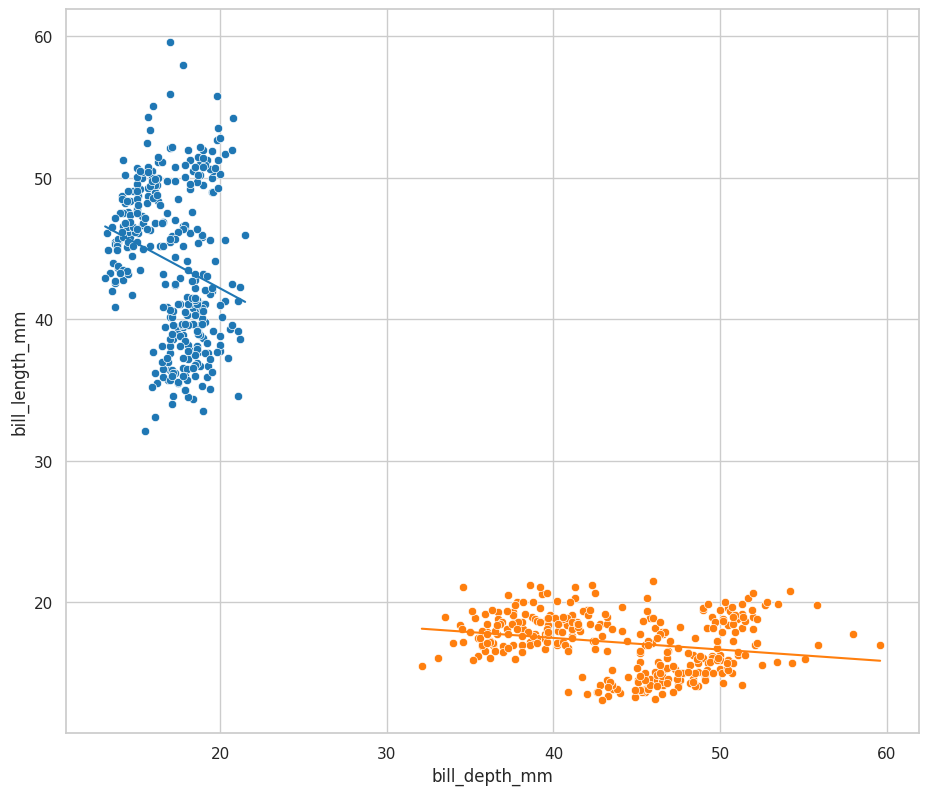

In [98]:
#Fig. 1
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);


#Fig. 2
sns.scatterplot(
    x=y,
    y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)


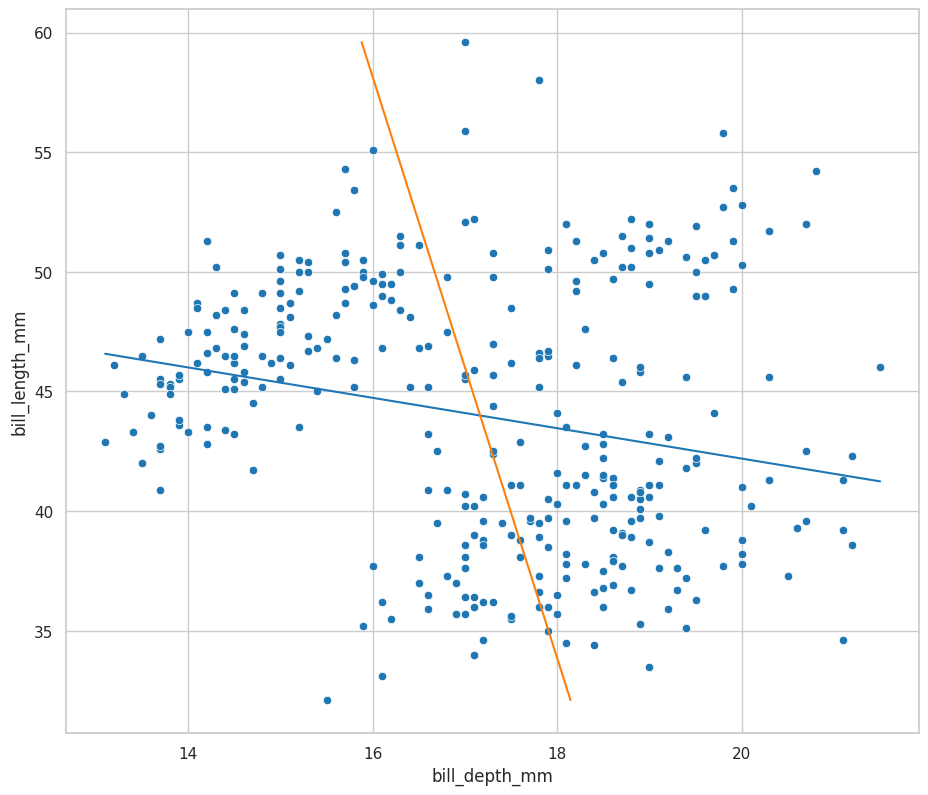

In [99]:
# Fig. 3
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [100]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data= processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [101]:
#bill_length como variable x
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data= processed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

Modelo 1: Peso de los pinguinos vs longitud del pico

In [102]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_1.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        15:52:35   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De la variable independiente bill_length vemos que la pendiente es de 86.79 lo que indica que por cada cambio en milimetro de longitud del pico se genera un cambio de 86 gramos en el peso.

- Modelo 2: Peso del pinguino vs longitud del pico, ancho del pico

#### Modelo 2

In [103]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        15:52:35   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

El valor que relaciona el peso con la longitud del pico cambia a 74.81. Por otro lado, la variable bill_depth indica que cada cambio en milimetros del ancho del pico genera un cambio de perdida de peso en 145 gr

- Modelo 3: Peso de los pinguinos vs longitud del pico, ancho del pico, longitud de las alas

In [104]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        15:52:35   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

El valor que relaciona el peso con la longitud del pico vuelve a cambiar siendo cada vez mas pequeño. El valor que relaciona el pecho con el ancho se vuelve pequeño y positivo. El valor de relacion entre las alas y el peso es de 50. 76 teniendo mayor relevancia.


Debemos tener en cuenta el R cuadrado de cada modelo ya que es un indicador de la variabilidad obtenida por las variables contrastadas. A mayor R cuadrado, se captura mejor el comportamiento de las variables. En el primer modelo es muy bajo (0.34). En el tercer modelo es de 0.76 lo que indica que captura mejor la variabilidad de los datos

- Modelo 4: Peso de los pinguinos vs longitud del pico, ancho del pico, longitud de las alas, sexo del pinguino donde sexo es de tipo categorica

In [105]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        15:52:35   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

La R cuadrado es cada vez mayor lo que indica que este ultimo modelo captura mucho mejor el comportamiento de las variables. El valor de la pendiente para la variable sexo indica que los macho pesan 541 gr mas que las hembras

- Modelo 5: Un modelo mientras mas sencillo mejor. Se debe contrastar aquellas variables que esten mas relacionadas con la variable objetivo; Esto ayuda a disminuir el error de los modelos y mejorar su efectividad de prediccion. Peso del pinguino vs longitud de las alas, sexo

In [106]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          3.53e-118
Time:                        15:52:35   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [107]:
models_result = pd.DataFrame(
    dict(
        actual_value = processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_result

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5    species     sex  
0           3579.136946         3441.323750     Adelie    male  
1           3343.220772         3328.384372     Adelie  female  
2           3639.137335         3751.223949     Adelie  female  
4           3457.954243         3657.259599     Adelie  female  
5           3764.536023         3864.163327     Adelie    male  
..                  ...                 ...        ...     ...  
339         4455.022405         4662.860306  Chinstrap    male  
340         3894.857519         4080.099176  Chinstrap  female  
341         4063.639819         4005.109853  Chinstrap    male  
342         4652.013882         4803.806832  Chinstrap    male  
343         3672.299099         3892.170475  Chinstrap  female  

[333 rows x 8 columns]

#### ECDFs

<AxesSubplot: ylabel='Proportion'>

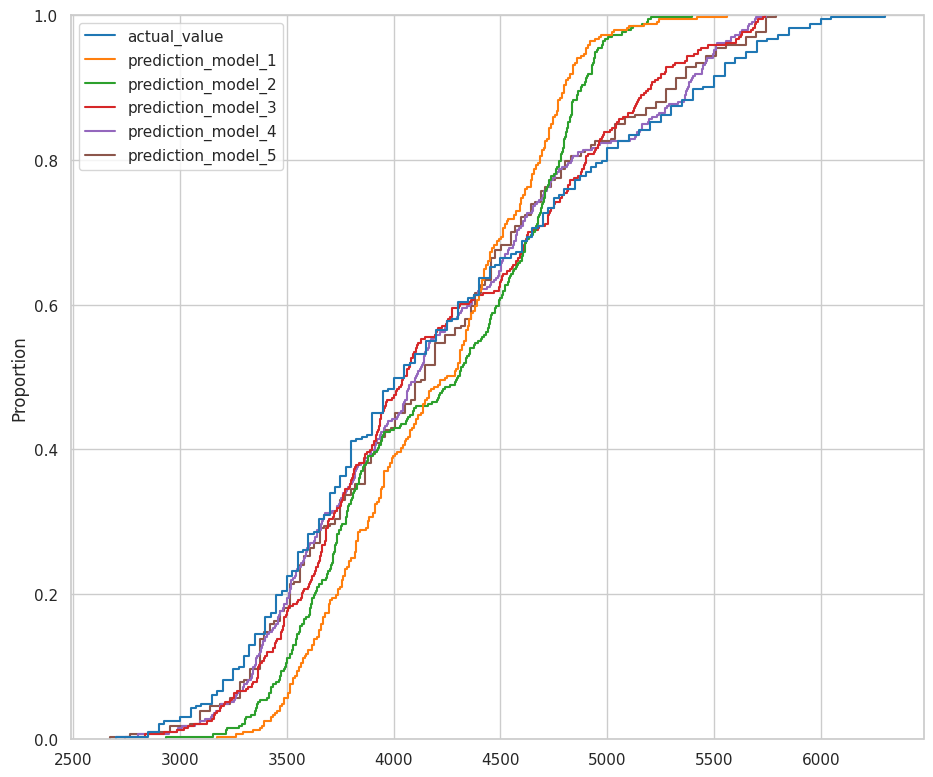

In [108]:
sns.ecdfplot(
    data=models_result
)

<AxesSubplot: ylabel='Proportion'>

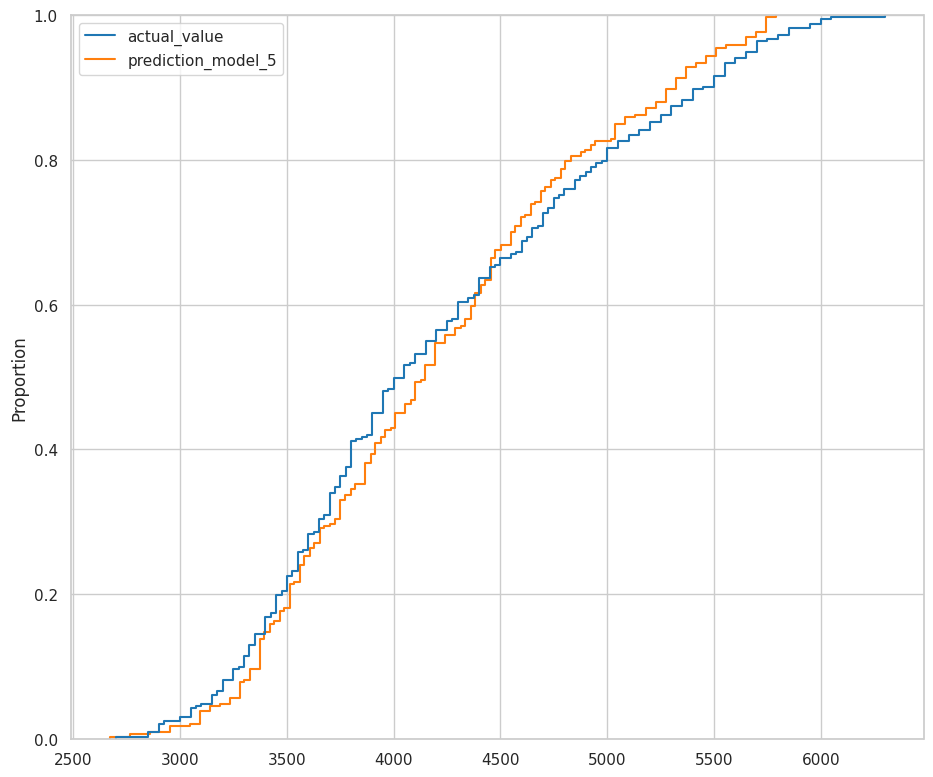

In [109]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value', 'prediction_model_5'])
)

#### PDFs

<AxesSubplot: ylabel='Density'>

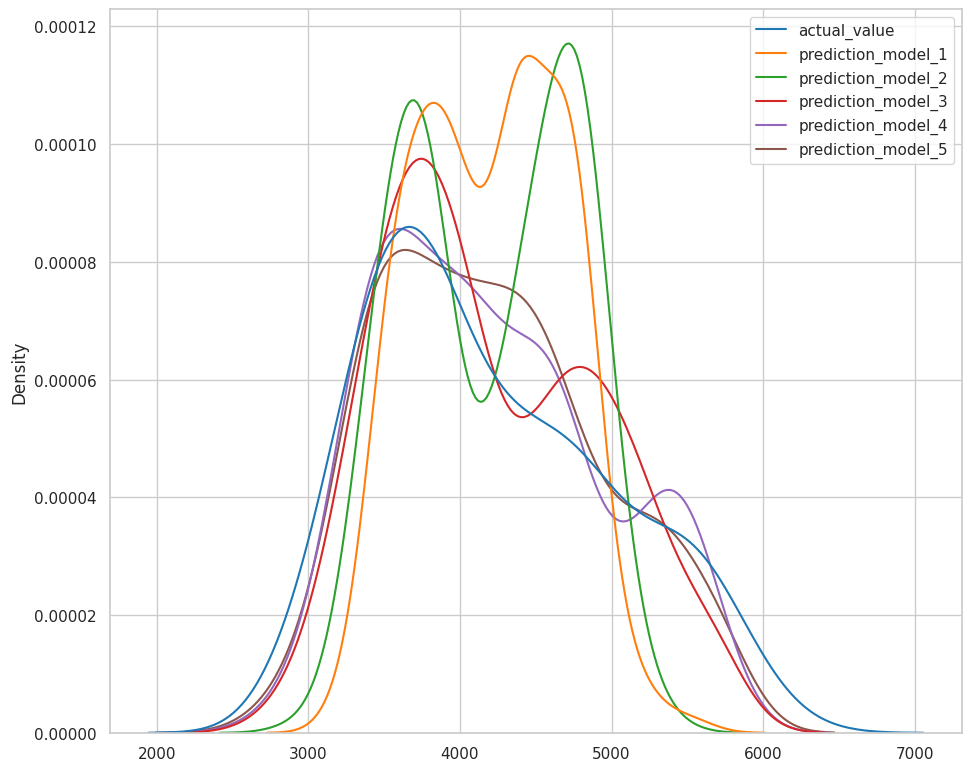

In [110]:
sns.kdeplot(
    data=models_result,
    cumulative=False #genera curvas suavizadas de tipo acumulativas
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

Pudimos haber encontrado las mismas conclusiones del modelo 5 si en el Analisis Exporatorio hubieramos experimentado con un grafico entre la longitud de las aletas y el peso de los pinguinos utilizando el sexo como variable categorica. El analisis exploratorio de los datos es sumamente importante ya que nos ayuda a intuir el modelo desde el inicio y de esa manera a ahorrar tiempo.

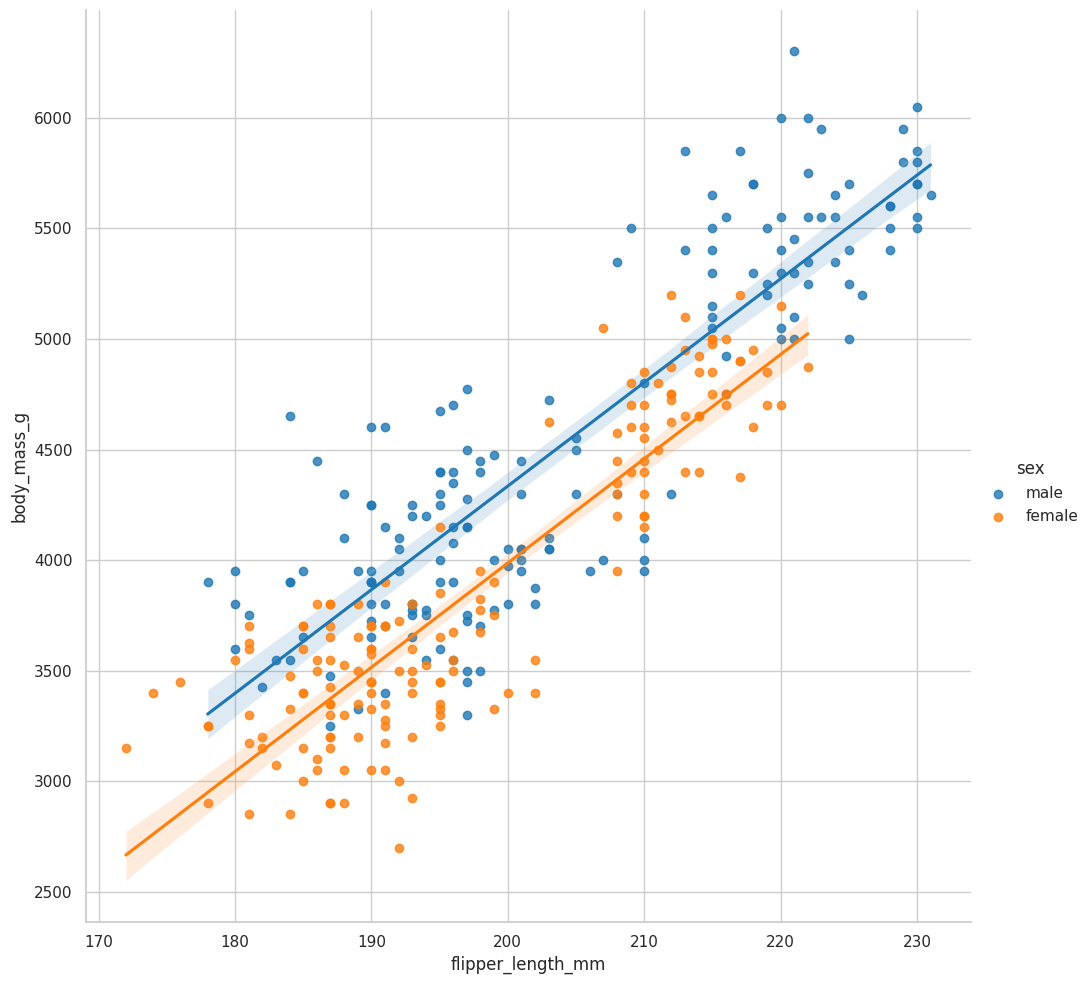

In [111]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [112]:
#Modelo logistico de la variable sexo VS longitud de las aletas, ancho del pico, largo del pico, y la isla
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        15:52:39   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [113]:
#Tabla de conteo de las variables categoricas isla y sexo
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [114]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
)

In [115]:
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  numeric_sex  is_adelie  
0         3750.0    male  2007            1          1  
1         3800.0  female  2007            0          1  
2         3250.0  female  2007            0          1  
4         3450.0  female  2007            0          1  
5         3650.0    male  2007            1          1  
..           ...     ...   ...          ...        ...  
339       4000.0    male  2009            1          0  
340       3400.0  female  2009            0          0  
341       3775.0    male  2009            1          0  
342       4100.0    male  2009            1          0  
343       3775.0  female  2009            0          0  

[333 rows x 10 columns]

In [116]:
model_is_adele = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


In [117]:
model_is_adele.params #muestra solo los parametros del modelo

Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [118]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.is_adelie,
        predicted_values = model_is_adele.predict().round()  #round indica solo si es cero o uno
    )
)

is_adelie_df_prediction

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
339              0               0.0
340              0               0.0
341              0               1.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

In [119]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)

actual_adelie  predicted_values  count
0              0               0.0    151
1              1               1.0    129
2              0               1.0     36
3              1               0.0     17

In [120]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)


[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

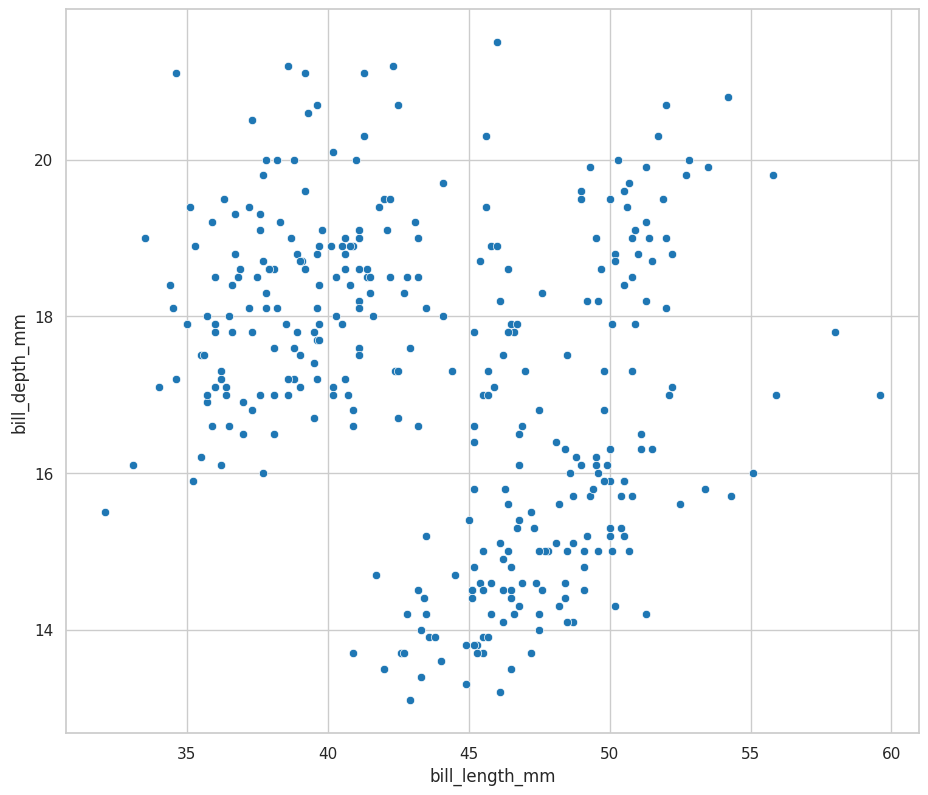

In [124]:
sns.scatterplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y='bill_depth_mm'
)

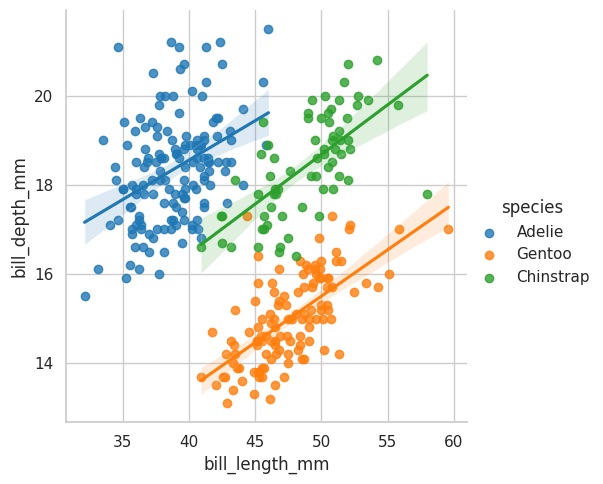

In [126]:
sns.lmplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y='bill_depth_mm',
    hue= 'species'
)

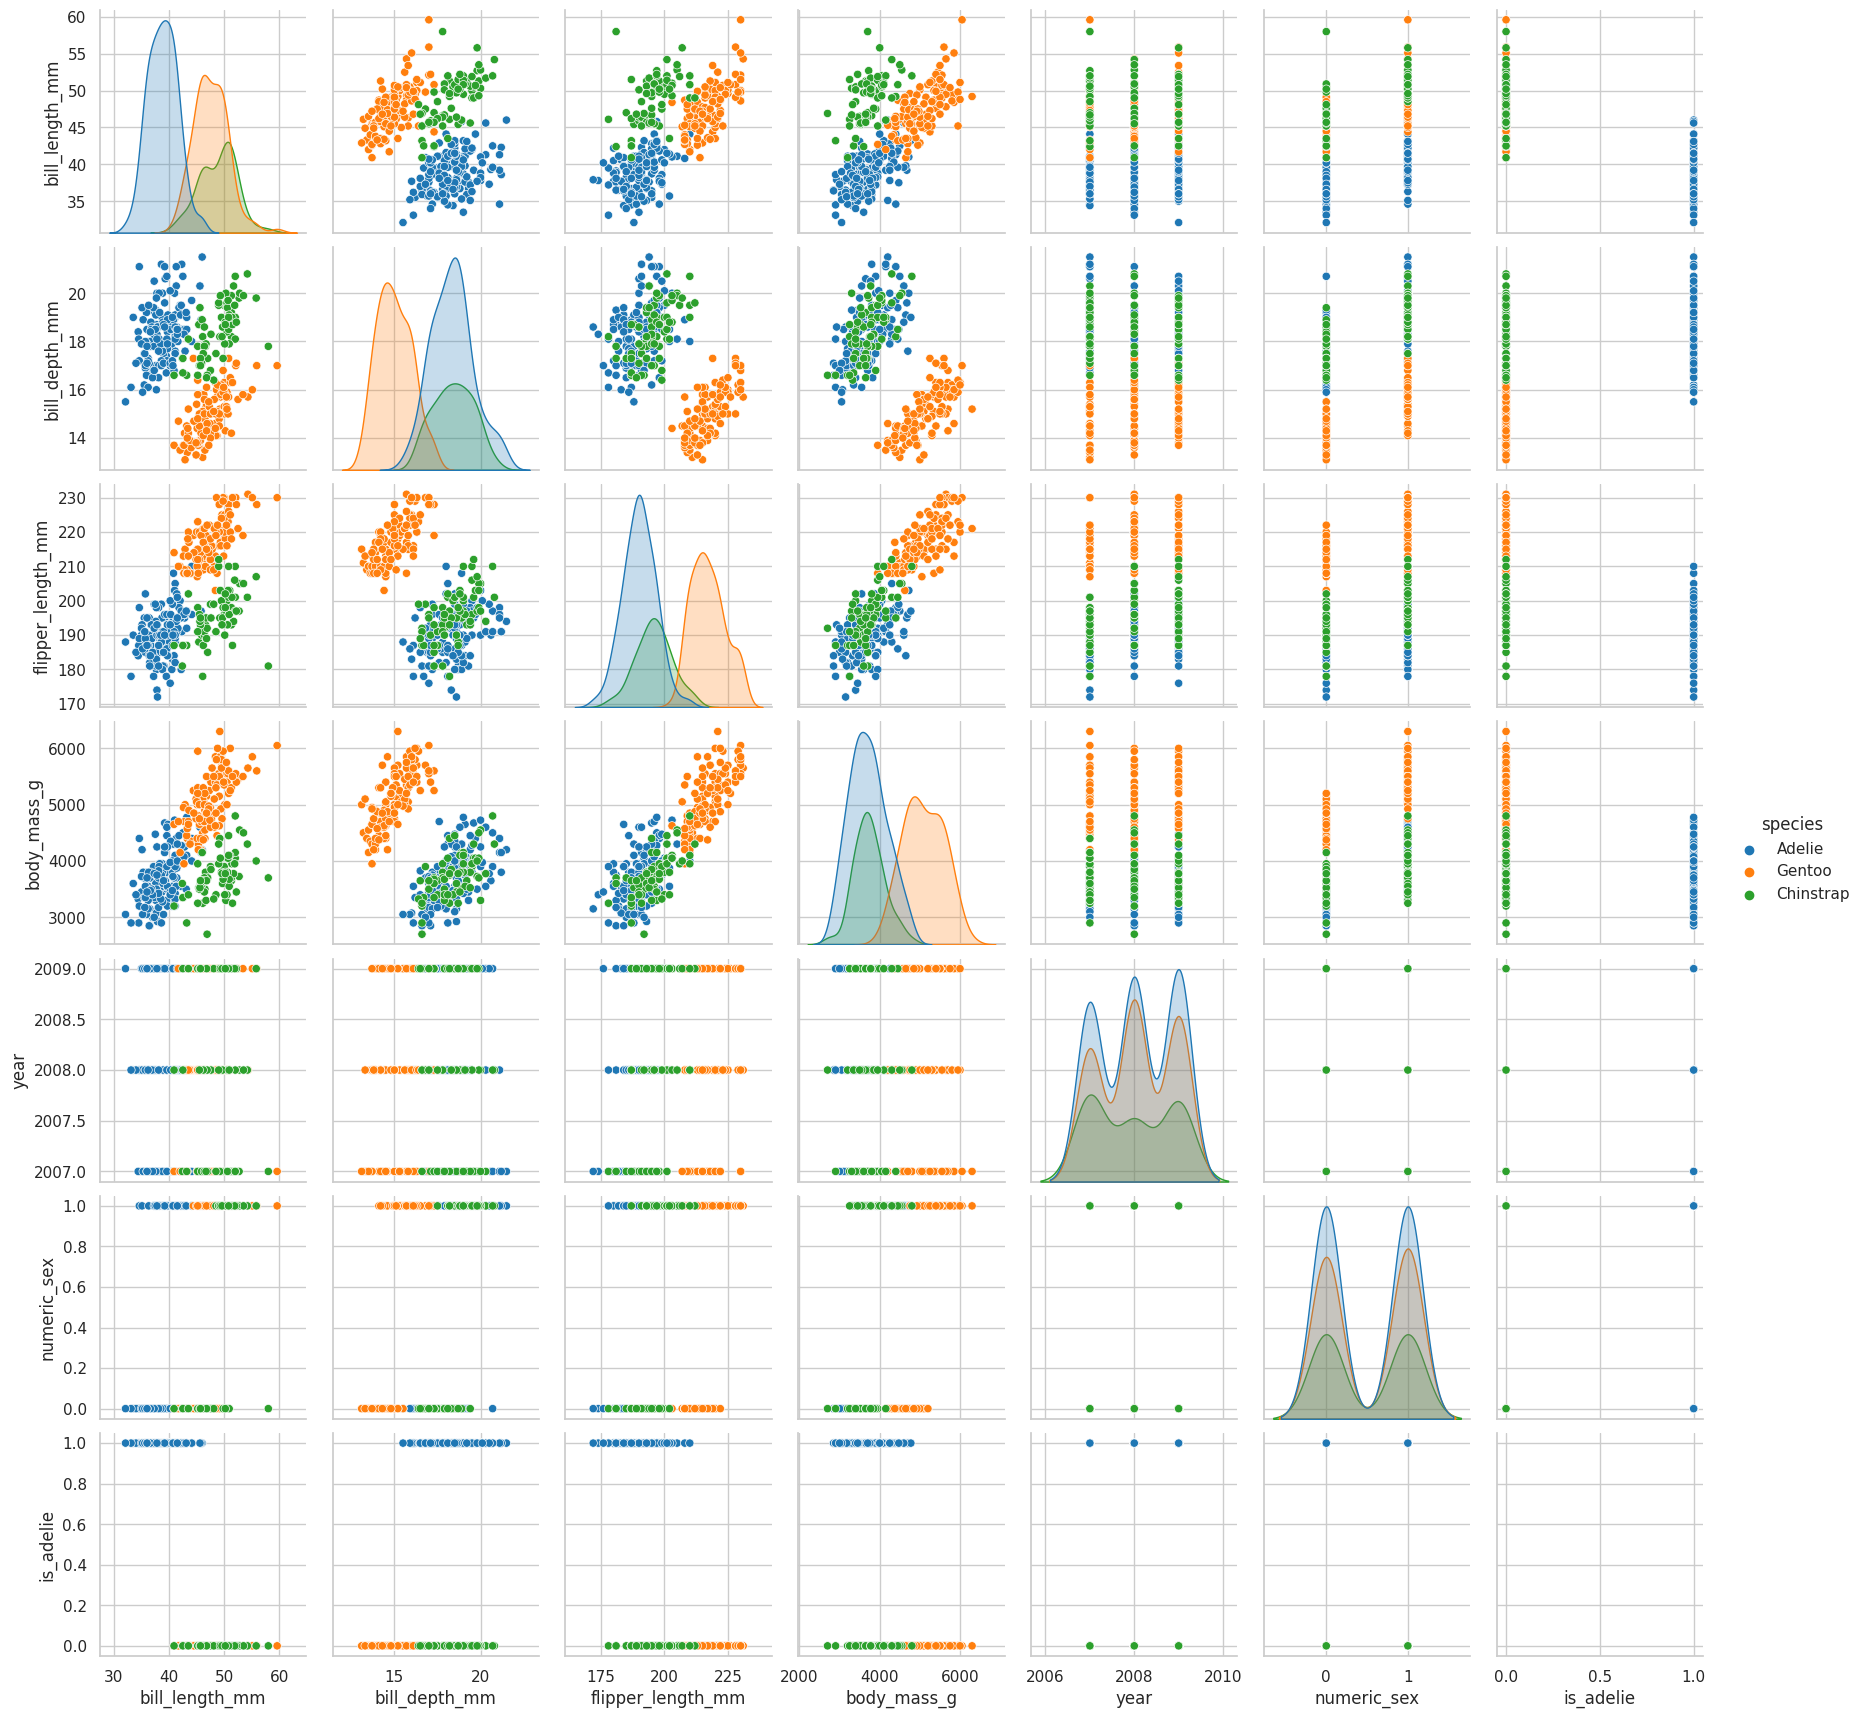

In [127]:
sns.pairplot(
    data = processed_penguins_df,

    hue= 'species'
)

In [128]:
processed_penguins_df = processed_penguins_df.assign(
    is_island_numeric=lambda df: df.island.replace(
        ["Torgersen", "Biscoe", "Dream"], (0, 1, 2)
    )
)

processed_penguins_df = processed_penguins_df.assign(
    is_species_numeric=lambda df: df.species.replace(
        ["Adelie", "Gentoo", "Chinstrap"], (0, 1, 2)
    )
)

In [129]:
import plotly.express as px
from sklearn.decomposition import PCA

X = processed_penguins_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year', 'numeric_sex',
       'is_island_numeric', 'is_species_numeric']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=processed_penguins_df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

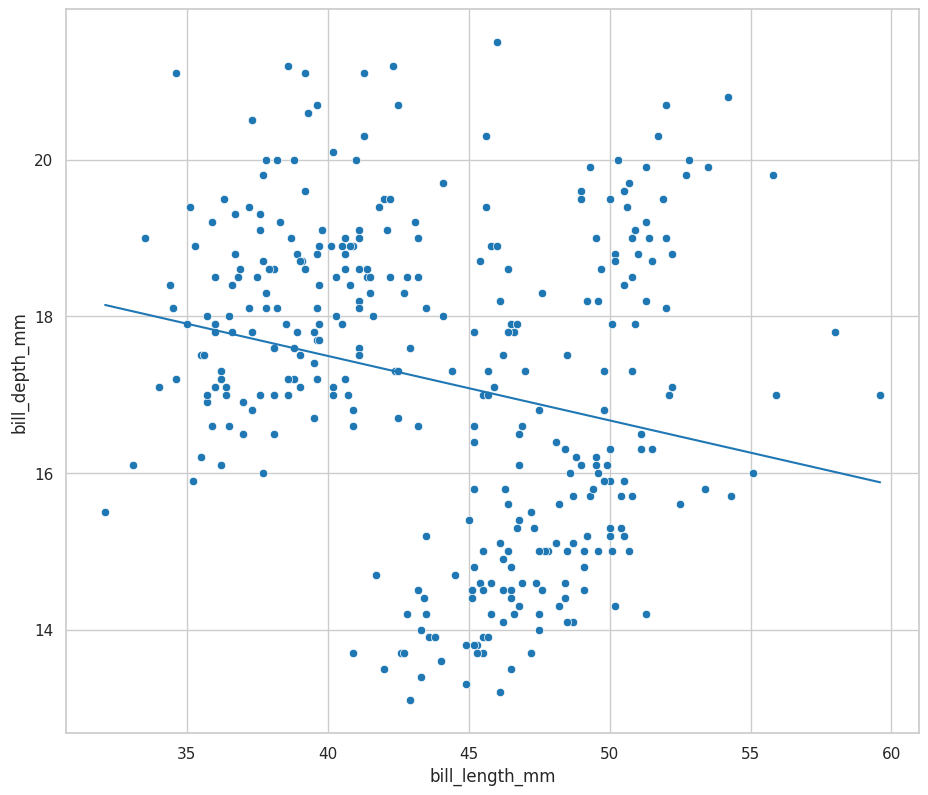

In [121]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

## Información de sesión

In [122]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d6aa91d-216f-471a-b452-a272879260ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>